In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid

In [ ]:
# S01 files

# Eq 0
ds_eq0= xr.open_dataset("/vortex1/jupyter-sanjanasatish/old_winds_new_forcing/linear_d2_prog__2841_021.nc", decode_times=False)
# Eq W
ds_eqw = xr.open_dataset("/vortex1/jupyter-sanjanasatish/winds/linear_d2_prog__3008_345.nc", decode_times=False)
# No curl
ds_curl0 = xr.open_dataset("/vortex1/jupyter-sanjanasatish/no_curl/original/linear_d2_prog__3218_292.nc", decode_times=False)


# S02 files
# Eq 0
ds_seq0= xr.open_dataset("/vortex1/jupyter-sanjanasatish/south_winds/south_old/linear_d2_prog__3618_192.nc", decode_times=False)
# Eq W
ds_seqw= xr.open_dataset("/vortex1/jupyter-sanjanasatish/south_winds/south_new/linear_d2_prog__3918_117.nc", decode_times=False)
# No curl
ds_scurl0 = xr.open_dataset("/vortex1/jupyter-sanjanasatish/no_curl/south/linear_d2_prog__4957_222.nc", decode_times=False)
#0.03 eq
ds_seq3 = xr.open_dataset("/vortex1/jupyter-sanjanasatish/0.03_winds/linear_d2_prog__4917_232.nc", decode_times=False)


#geometry
geo = xr.open_dataset('/vortex1/jupyter-sanjanasatish/with_precip/ocean_geometry.nc', decode_times=False)
geo = geo.rename({'lath' : 'yh','lonh' : 'xh','latq' : 'yq','lonq' : 'xq'}) #renaming the coords to align with the original dataset

In [4]:
ds_seq0= xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq0/linear_d2_prog__5308_170.nc", decode_times=False)
# No curl
ds_scurl0 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq4/linear_d2_prog__4957_222.nc", decode_times=False)
#0.03
ds_seq3 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq3/linear_d2_prog__4917_232.nc", decode_times=False)
#0.02
ds_seq2 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq2_new/linear_d2_prog__4911_274.nc", decode_times=False)

#geometry
geo = xr.open_dataset('/media/sanjana/T7 Shield/Code/with_precip/ocean_geometry.nc', decode_times=False)
geo = geo.rename({'lath' : 'yh','lonh' : 'xh','latq' : 'yq','lonq' : 'xq'}) #renaming the coords to align with the original dataset

# Eq 02 and Eq 03

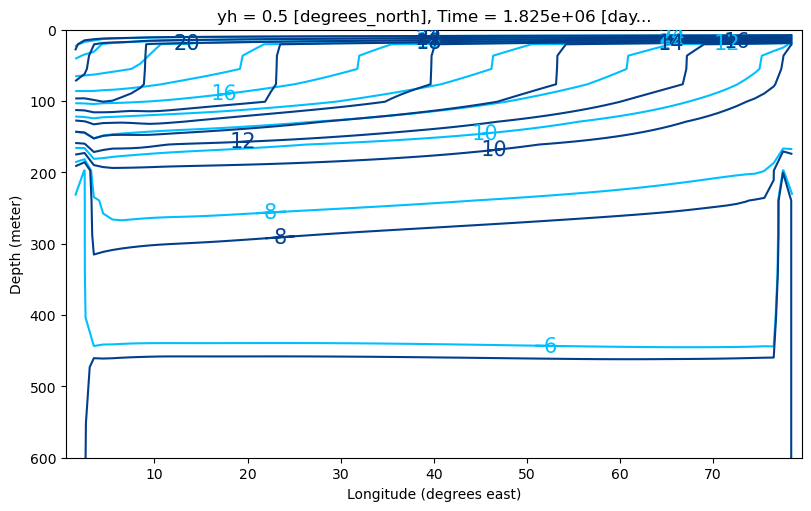

In [3]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8, 5))

# Plot contours
seqw=ds_seqw.temp.isel(yh=70, Time=-1).plot.contour(levels=15, colors='deepskyblue', add_colorbar=False)
seq3=ds_seq3.temp.isel(yh=70, Time=-1).plot.contour(levels=15, colors='#023E8A', add_colorbar=False)

# Add contour labels
ax.clabel(seqw, inline_spacing=-19, fontsize=15, colors='deepskyblue')
ax.clabel(seq3, inline_spacing=-19, fontsize=15, colors='#023E8A')

# Set axis limits and labels
ax.set_ylim(0, 600)
ax.invert_yaxis()
plt.xlabel('Longitude (degrees east)')
plt.ylabel('Depth (meter)')
plt.tick_params(axis='both', which='major')
# Show the plot
plt.show()

In [5]:
a1=[6.0,8.0,10.0,12.0,14.0,16.0,18.0,20.0]


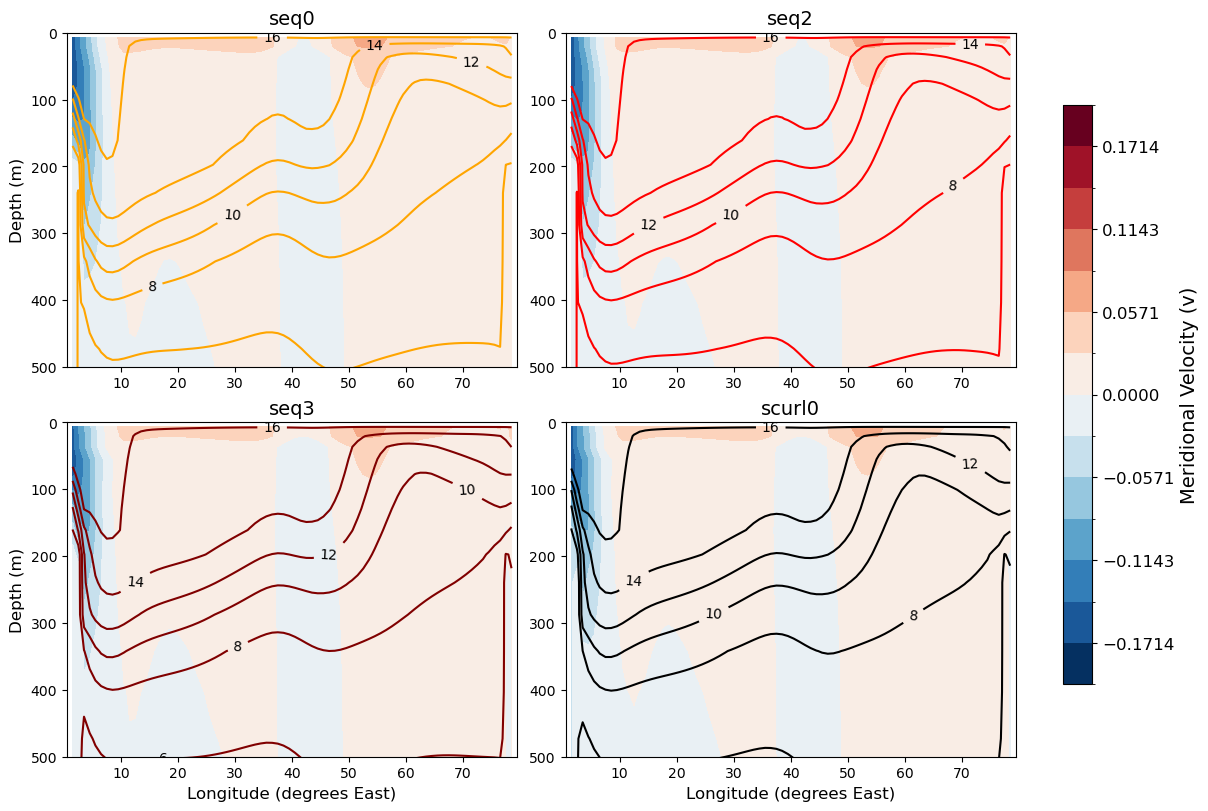

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

a = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]
# Plot the contourf and contours
vseq0 = ds_seq0.v.isel(yq=40, Time=-1).plot.contourf(ax=ax[0, 0], levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=40, Time=-1).plot.contour(ax=ax[0, 0], levels=a1, colors="orange")

vseqw = ds_seq2.v.isel(yq=40, Time=-1).plot.contourf(ax=ax[0, 1], levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seqw = ds_seq2.temp.isel(yh=40, Time=-1).plot.contour(ax=ax[0, 1], levels=a1, colors="r")

vseq3 = ds_seq3.v.isel(yq=40, Time=-1).plot.contourf(ax=ax[1, 0], levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq3 = ds_seq3.temp.isel(yh=40, Time=-1).plot.contour(ax=ax[1, 0], levels=a1, colors="maroon")

vcurl0 = ds_scurl0.v.isel(yq=40, Time=-1).plot.contourf(ax=ax[1, 1], levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
scurl0 = ds_scurl0.temp.isel(yh=40, Time=-1).plot.contour(ax=ax[1, 1], levels=a1, colors="black")

# Add contour labels
ax[0, 0].clabel(seq0, fontsize=10, colors='black')
ax[0, 1].clabel(seqw, fontsize=10, colors='black')
ax[1, 0].clabel(seq3, fontsize=10, colors='black')
ax[1, 1].clabel(scurl0, fontsize=10, colors='black')

# Set titles
ax[0, 0].set_title("seq0", fontsize=14)
ax[0, 1].set_title("seq2", fontsize=14)
ax[1, 0].set_title("seq3", fontsize=14)
ax[1, 1].set_title("scurl0", fontsize=14)

# Set y-limits and invert axes
for axis in ax.flat:
    axis.set_ylim(0, 500)
    axis.invert_yaxis()

# Add x and y labels
ax[1, 0].set_xlabel("Longitude (degrees East)", fontsize=12)
ax[0, 0].set_xlabel("")
ax[1, 1].set_xlabel("Longitude (degrees East)", fontsize=12)
ax[0, 1].set_xlabel("")

ax[0, 0].set_ylabel("Depth (m)", fontsize=12)
ax[0, 1].set_ylabel("")

ax[1, 0].set_ylabel("Depth (m)", fontsize=12)
ax[1, 1].set_ylabel("")


# Increase tick size and font size for all axes
for axis in ax.flat:
    axis.tick_params(axis='both', which='major', labelsize=10)
    axis.tick_params(axis='both', which='minor', labelsize=8)

# Add a single colorbar
cbar = fig.colorbar(vseq0, ax=ax, location='right', shrink=0.8)
cbar.ax.tick_params(labelsize=12)  # Increase colorbar tick font size
cbar.set_label('Meridional Velocity (v)', fontsize=14)  # Set colorbar label and font size

plt.show()


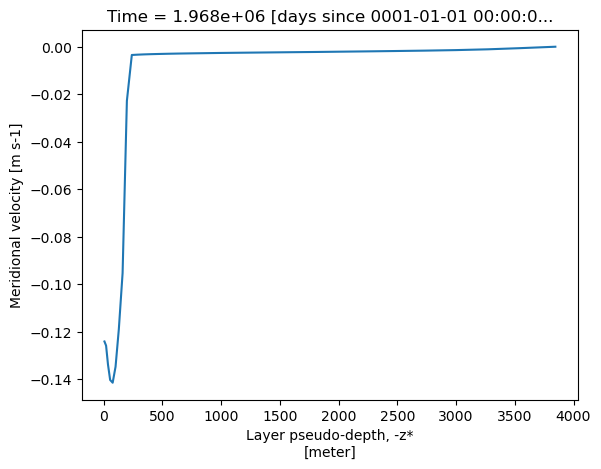

In [25]:
a=ds_seq0.v.isel(Time=-1,yq=40,xh=2)
a.plot()


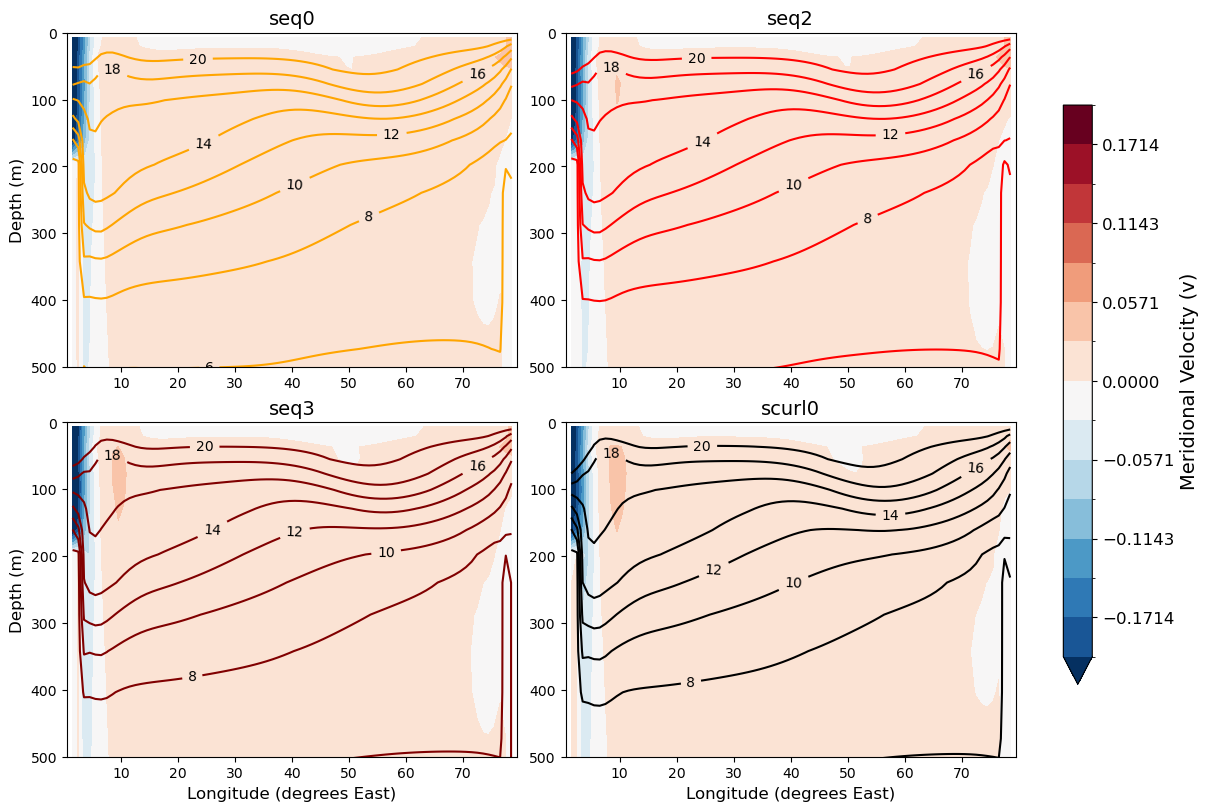

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

a = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]

# Plot the contourf and contours
vseq0 = ds_seq0.v.isel(yq=50, Time=-1).plot.contourf(ax=ax[0, 0], levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=50, Time=-1).plot.contour(ax=ax[0, 0], levels=a1, colors="orange")

vseqw = ds_seqw.v.isel(yq=50, Time=-1).plot.contourf(ax=ax[0, 1], levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seqw = ds_seqw.temp.isel(yh=50, Time=-1).plot.contour(ax=ax[0, 1], levels=a1, colors="r")

vseq3 = ds_seq3.v.isel(yq=50, Time=-1).plot.contourf(ax=ax[1, 0], levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq3 = ds_seq3.temp.isel(yh=50, Time=-1).plot.contour(ax=ax[1, 0], levels=a1, colors="maroon")

vcurl0 = ds_scurl0.v.isel(yq=50, Time=-1).plot.contourf(ax=ax[1, 1], levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
scurl0 = ds_scurl0.temp.isel(yh=50, Time=-1).plot.contour(ax=ax[1, 1], levels=a1, colors="black")

# Add contour labels
ax[0, 0].clabel(seq0, fontsize=10, colors='black')
ax[0, 1].clabel(seqw, fontsize=10, colors='black')
ax[1, 0].clabel(seq3, fontsize=10, colors='black')
ax[1, 1].clabel(scurl0, fontsize=10, colors='black')

# Set titles
ax[0, 0].set_title("seq0", fontsize=14)
ax[0, 1].set_title("seq2", fontsize=14)
ax[1, 0].set_title("seq3", fontsize=14)
ax[1, 1].set_title("scurl0", fontsize=14)

# Set y-limits and invert axes
for axis in ax.flat:
    axis.set_ylim(0, 500)
    axis.invert_yaxis()

# Add x and y labels
ax[1, 0].set_xlabel("Longitude (degrees East)", fontsize=12)
ax[0, 0].set_xlabel("")
ax[1, 1].set_xlabel("Longitude (degrees East)", fontsize=12)
ax[0, 1].set_xlabel("")

ax[0, 0].set_ylabel("Depth (m)", fontsize=12)
ax[0, 1].set_ylabel("")

ax[1, 0].set_ylabel("Depth (m)", fontsize=12)
ax[1, 1].set_ylabel("")


# Increase tick size and font size for all axes
for axis in ax.flat:
    axis.tick_params(axis='both', which='major', labelsize=10)
    axis.tick_params(axis='both', which='minor', labelsize=8)

# Add a single colorbar
cbar = fig.colorbar(vseq0, ax=ax, location='right', shrink=0.8)
cbar.ax.tick_params(labelsize=12)  # Increase colorbar tick font size
cbar.set_label('Meridional Velocity (v)', fontsize=14)  # Set colorbar label and font size

plt.show()


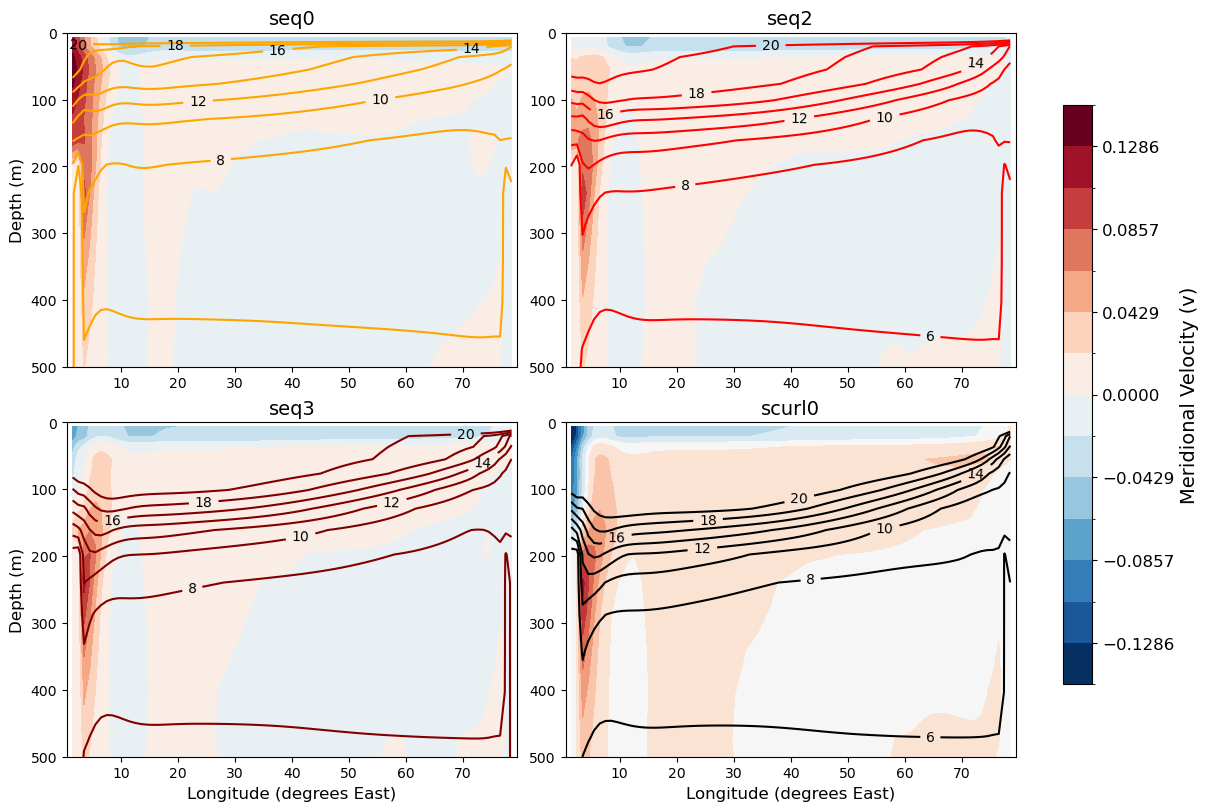

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

a = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]

# Plot the contourf and contours
vseq0 = ds_seq0.v.isel(yq=60, Time=-1).plot.contourf(ax=ax[0, 0], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=60, Time=-1).plot.contour(ax=ax[0, 0], levels=a1, colors="orange")

vseqw = ds_seqw.v.isel(yq=60, Time=-1).plot.contourf(ax=ax[0, 1], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
seqw = ds_seqw.temp.isel(yh=60, Time=-1).plot.contour(ax=ax[0, 1], levels=a1, colors="r")

vseq3 = ds_seq3.v.isel(yq=60, Time=-1).plot.contourf(ax=ax[1, 0], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
seq3 = ds_seq3.temp.isel(yh=60, Time=-1).plot.contour(ax=ax[1, 0], levels=a1, colors="maroon")

vcurl0 = ds_scurl0.v.isel(yq=60, Time=-1).plot.contourf(ax=ax[1, 1], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
scurl0 = ds_scurl0.temp.isel(yh=60, Time=-1).plot.contour(ax=ax[1, 1], levels=a1, colors="black")

# Add contour labels
ax[0, 0].clabel(seq0, fontsize=10, colors='black')
ax[0, 1].clabel(seqw, fontsize=10, colors='black')
ax[1, 0].clabel(seq3, fontsize=10, colors='black')
ax[1, 1].clabel(scurl0, fontsize=10, colors='black')

# Set titles
ax[0, 0].set_title("seq0", fontsize=14)
ax[0, 1].set_title("seq2", fontsize=14)
ax[1, 0].set_title("seq3", fontsize=14)
ax[1, 1].set_title("scurl0", fontsize=14)

# Set y-limits and invert axes
for axis in ax.flat:
    axis.set_ylim(0, 500)
    axis.invert_yaxis()

# Add x and y labels
ax[1, 0].set_xlabel("Longitude (degrees East)", fontsize=12)
ax[0, 0].set_xlabel("")
ax[1, 1].set_xlabel("Longitude (degrees East)", fontsize=12)
ax[0, 1].set_xlabel("")

ax[0, 0].set_ylabel("Depth (m)", fontsize=12)
ax[0, 1].set_ylabel("")

ax[1, 0].set_ylabel("Depth (m)", fontsize=12)
ax[1, 1].set_ylabel("")


# Increase tick size and font size for all axes
for axis in ax.flat:
    axis.tick_params(axis='both', which='major', labelsize=10)
    axis.tick_params(axis='both', which='minor', labelsize=8)

# Add a single colorbar
cbar = fig.colorbar(vseq0, ax=ax, location='right', shrink=0.8)
cbar.ax.tick_params(labelsize=12)  # Increase colorbar tick font size
cbar.set_label('Meridional Velocity (v)', fontsize=14)  # Set colorbar label and font size

plt.show()


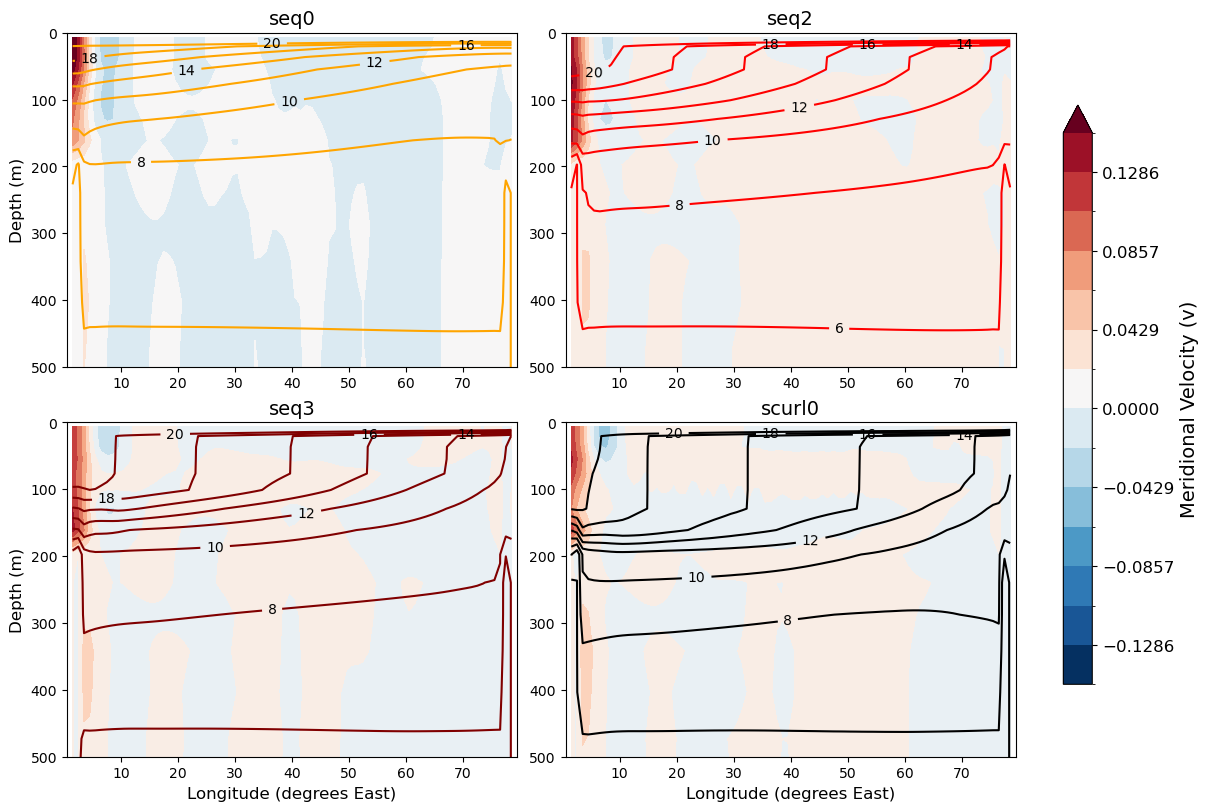

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

a = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]

# Plot the contourf and contours
vseq0 = ds_seq0.v.isel(yq=70, Time=-1).plot.contourf(ax=ax[0, 0], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=70, Time=-1).plot.contour(ax=ax[0, 0], levels=a1, colors="orange")

vseqw = ds_seqw.v.isel(yq=70, Time=-1).plot.contourf(ax=ax[0, 1], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
seqw = ds_seqw.temp.isel(yh=70, Time=-1).plot.contour(ax=ax[0, 1], levels=a1, colors="r")

vseq3 = ds_seq3.v.isel(yq=70, Time=-1).plot.contourf(ax=ax[1, 0], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
seq3 = ds_seq3.temp.isel(yh=70, Time=-1).plot.contour(ax=ax[1, 0], levels=a1, colors="maroon")

vcurl0 = ds_scurl0.v.isel(yq=70, Time=-1).plot.contourf(ax=ax[1, 1], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
scurl0 = ds_scurl0.temp.isel(yh=70, Time=-1).plot.contour(ax=ax[1, 1], levels=a1, colors="black")

# Add contour labels
ax[0, 0].clabel(seq0, fontsize=10, colors='black')
ax[0, 1].clabel(seqw, fontsize=10, colors='black')
ax[1, 0].clabel(seq3, fontsize=10, colors='black')
ax[1, 1].clabel(scurl0, fontsize=10, colors='black')

# Set titles
ax[0, 0].set_title("seq0", fontsize=14)
ax[0, 1].set_title("seq2", fontsize=14)
ax[1, 0].set_title("seq3", fontsize=14)
ax[1, 1].set_title("scurl0", fontsize=14)

# Set y-limits and invert axes
for axis in ax.flat:
    axis.set_ylim(0, 500)
    axis.invert_yaxis()

# Add x and y labels
ax[1, 0].set_xlabel("Longitude (degrees East)", fontsize=12)
ax[0, 0].set_xlabel("")
ax[1, 1].set_xlabel("Longitude (degrees East)", fontsize=12)
ax[0, 1].set_xlabel("")

ax[0, 0].set_ylabel("Depth (m)", fontsize=12)
ax[0, 1].set_ylabel("")

ax[1, 0].set_ylabel("Depth (m)", fontsize=12)
ax[1, 1].set_ylabel("")


# Increase tick size and font size for all axes
for axis in ax.flat:
    axis.tick_params(axis='both', which='major', labelsize=10)
    axis.tick_params(axis='both', which='minor', labelsize=8)

# Add a single colorbar
cbar = fig.colorbar(vseq0, ax=ax, location='right', shrink=0.8)
cbar.ax.tick_params(labelsize=12)  # Increase colorbar tick font size
cbar.set_label('Meridional Velocity (v)', fontsize=14)  # Set colorbar label and font size

plt.show()


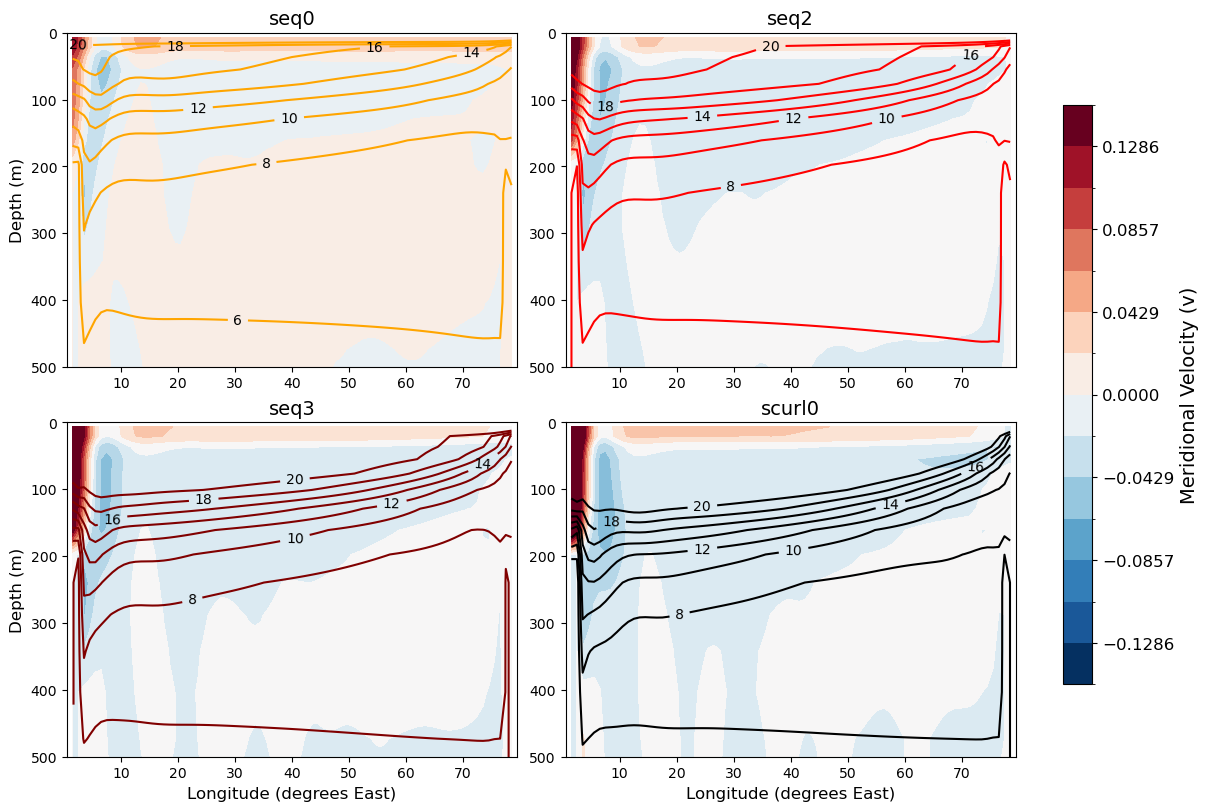

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

a = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]

# Plot the contourf and contours
vseq0 = ds_seq0.v.isel(yq=80, Time=-1).plot.contourf(ax=ax[0, 0], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=80, Time=-1).plot.contour(ax=ax[0, 0], levels=a1, colors="orange")

vseqw = ds_seqw.v.isel(yq=80, Time=-1).plot.contourf(ax=ax[0, 1], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
seqw = ds_seqw.temp.isel(yh=80, Time=-1).plot.contour(ax=ax[0, 1], levels=a1, colors="r")

vseq3 = ds_seq3.v.isel(yq=80, Time=-1).plot.contourf(ax=ax[1, 0], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
seq3 = ds_seq3.temp.isel(yh=80, Time=-1).plot.contour(ax=ax[1, 0], levels=a1, colors="maroon")

vcurl0 = ds_scurl0.v.isel(yq=80, Time=-1).plot.contourf(ax=ax[1, 1], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
scurl0 = ds_scurl0.temp.isel(yh=80, Time=-1).plot.contour(ax=ax[1, 1], levels=a1, colors="black")

# Add contour labels
ax[0, 0].clabel(seq0, fontsize=10, colors='black')
ax[0, 1].clabel(seqw, fontsize=10, colors='black')
ax[1, 0].clabel(seq3, fontsize=10, colors='black')
ax[1, 1].clabel(scurl0, fontsize=10, colors='black')

# Set titles
ax[0, 0].set_title("seq0", fontsize=14)
ax[0, 1].set_title("seq2", fontsize=14)
ax[1, 0].set_title("seq3", fontsize=14)
ax[1, 1].set_title("scurl0", fontsize=14)

# Set y-limits and invert axes
for axis in ax.flat:
    axis.set_ylim(0, 500)
    axis.invert_yaxis()

# Add x and y labels
ax[1, 0].set_xlabel("Longitude (degrees East)", fontsize=12)
ax[0, 0].set_xlabel("")
ax[1, 1].set_xlabel("Longitude (degrees East)", fontsize=12)
ax[0, 1].set_xlabel("")

ax[0, 0].set_ylabel("Depth (m)", fontsize=12)
ax[0, 1].set_ylabel("")

ax[1, 0].set_ylabel("Depth (m)", fontsize=12)
ax[1, 1].set_ylabel("")


# Increase tick size and font size for all axes
for axis in ax.flat:
    axis.tick_params(axis='both', which='major', labelsize=10)
    axis.tick_params(axis='both', which='minor', labelsize=8)

# Add a single colorbar
cbar = fig.colorbar(vseq0, ax=ax, location='right', shrink=0.8)
cbar.ax.tick_params(labelsize=12)  # Increase colorbar tick font size
cbar.set_label('Meridional Velocity (v)', fontsize=14)  # Set colorbar label and font size

plt.show()


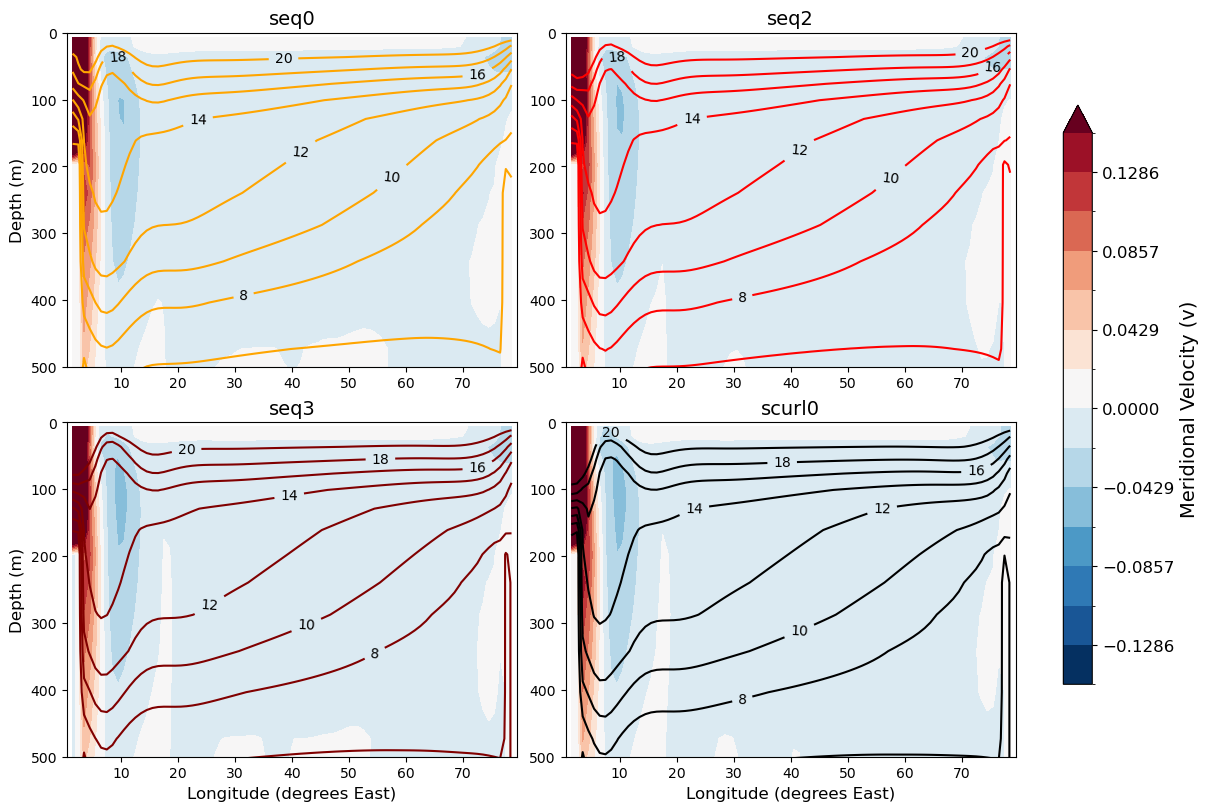

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

a = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]

# Plot the contourf and contours
vseq0 = ds_seq0.v.isel(yq=90, Time=-1).plot.contourf(ax=ax[0, 0], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=90, Time=-1).plot.contour(ax=ax[0, 0], levels=a1, colors="orange")

vseqw = ds_seqw.v.isel(yq=90, Time=-1).plot.contourf(ax=ax[0, 1], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
seqw = ds_seqw.temp.isel(yh=90, Time=-1).plot.contour(ax=ax[0, 1], levels=a1, colors="r")

vseq3 = ds_seq3.v.isel(yq=90, Time=-1).plot.contourf(ax=ax[1, 0], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
seq3 = ds_seq3.temp.isel(yh=90, Time=-1).plot.contour(ax=ax[1, 0], levels=a1, colors="maroon")

vcurl0 = ds_scurl0.v.isel(yq=90, Time=-1).plot.contourf(ax=ax[1, 1], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
scurl0 = ds_scurl0.temp.isel(yh=90, Time=-1).plot.contour(ax=ax[1, 1], levels=a1, colors="black")

# Add contour labels
ax[0, 0].clabel(seq0, fontsize=10, colors='black')
ax[0, 1].clabel(seqw, fontsize=10, colors='black')
ax[1, 0].clabel(seq3, fontsize=10, colors='black')
ax[1, 1].clabel(scurl0, fontsize=10, colors='black')

# Set titles
ax[0, 0].set_title("seq0", fontsize=14)
ax[0, 1].set_title("seq2", fontsize=14)
ax[1, 0].set_title("seq3", fontsize=14)
ax[1, 1].set_title("scurl0", fontsize=14)

# Set y-limits and invert axes
for axis in ax.flat:
    axis.set_ylim(0, 500)
    axis.invert_yaxis()

# Add x and y labels
ax[1, 0].set_xlabel("Longitude (degrees East)", fontsize=12)
ax[0, 0].set_xlabel("")
ax[1, 1].set_xlabel("Longitude (degrees East)", fontsize=12)
ax[0, 1].set_xlabel("")

ax[0, 0].set_ylabel("Depth (m)", fontsize=12)
ax[0, 1].set_ylabel("")

ax[1, 0].set_ylabel("Depth (m)", fontsize=12)
ax[1, 1].set_ylabel("")


# Increase tick size and font size for all axes
for axis in ax.flat:
    axis.tick_params(axis='both', which='major', labelsize=10)
    axis.tick_params(axis='both', which='minor', labelsize=8)

# Add a single colorbar
cbar = fig.colorbar(vseq0, ax=ax, location='right', shrink=0.8)
cbar.ax.tick_params(labelsize=12)  # Increase colorbar tick font size
cbar.set_label('Meridional Velocity (v)', fontsize=14)  # Set colorbar label and font size

plt.show()


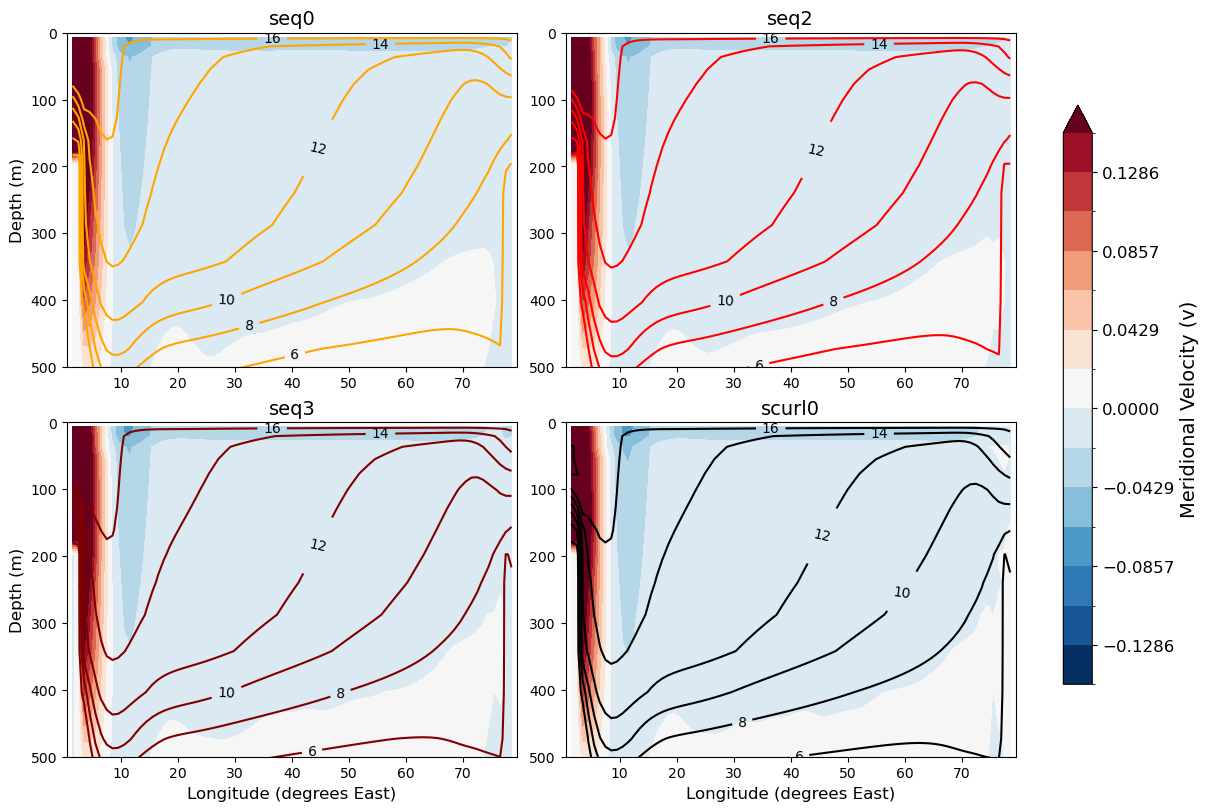

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

a = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]

# Plot the contourf and contours
vseq0 = ds_seq0.v.isel(yq=100, Time=-1).plot.contourf(ax=ax[0, 0], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=100, Time=-1).plot.contour(ax=ax[0, 0], levels=a1, colors="orange")

vseqw = ds_seqw.v.isel(yq=100, Time=-1).plot.contourf(ax=ax[0, 1], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
seqw = ds_seqw.temp.isel(yh=100, Time=-1).plot.contour(ax=ax[0, 1], levels=a1, colors="r")

vseq3 = ds_seq3.v.isel(yq=100, Time=-1).plot.contourf(ax=ax[1, 0], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
seq3 = ds_seq3.temp.isel(yh=100, Time=-1).plot.contour(ax=ax[1, 0], levels=a1, colors="maroon")

vcurl0 = ds_scurl0.v.isel(yq=100, Time=-1).plot.contourf(ax=ax[1, 1], levels=15, cmap="RdBu_r", vmax=0.15, add_colorbar=False)
scurl0 = ds_scurl0.temp.isel(yh=100, Time=-1).plot.contour(ax=ax[1, 1], levels=a1, colors="black")

# Add contour labels
ax[0, 0].clabel(seq0, fontsize=10, colors='black')
ax[0, 1].clabel(seqw, fontsize=10, colors='black')
ax[1, 0].clabel(seq3, fontsize=10, colors='black')
ax[1, 1].clabel(scurl0, fontsize=10, colors='black')

# Set titles
ax[0, 0].set_title("seq0", fontsize=14)
ax[0, 1].set_title("seq2", fontsize=14)
ax[1, 0].set_title("seq3", fontsize=14)
ax[1, 1].set_title("scurl0", fontsize=14)

# Set y-limits and invert axes
for axis in ax.flat:
    axis.set_ylim(0, 500)
    axis.invert_yaxis()

# Add x and y labels
ax[1, 0].set_xlabel("Longitude (degrees East)", fontsize=12)
ax[0, 0].set_xlabel("")
ax[1, 1].set_xlabel("Longitude (degrees East)", fontsize=12)
ax[0, 1].set_xlabel("")

ax[0, 0].set_ylabel("Depth (m)", fontsize=12)
ax[0, 1].set_ylabel("")

ax[1, 0].set_ylabel("Depth (m)", fontsize=12)
ax[1, 1].set_ylabel("")


# Increase tick size and font size for all axes
for axis in ax.flat:
    axis.tick_params(axis='both', which='major', labelsize=10)
    axis.tick_params(axis='both', which='minor', labelsize=8)

# Add a single colorbar
cbar = fig.colorbar(vseq0, ax=ax, location='right', shrink=0.8)
cbar.ax.tick_params(labelsize=12)  # Increase colorbar tick font size
cbar.set_label('Meridional Velocity (v)', fontsize=14)  # Set colorbar label and font size

plt.show()


# Temperature Contours

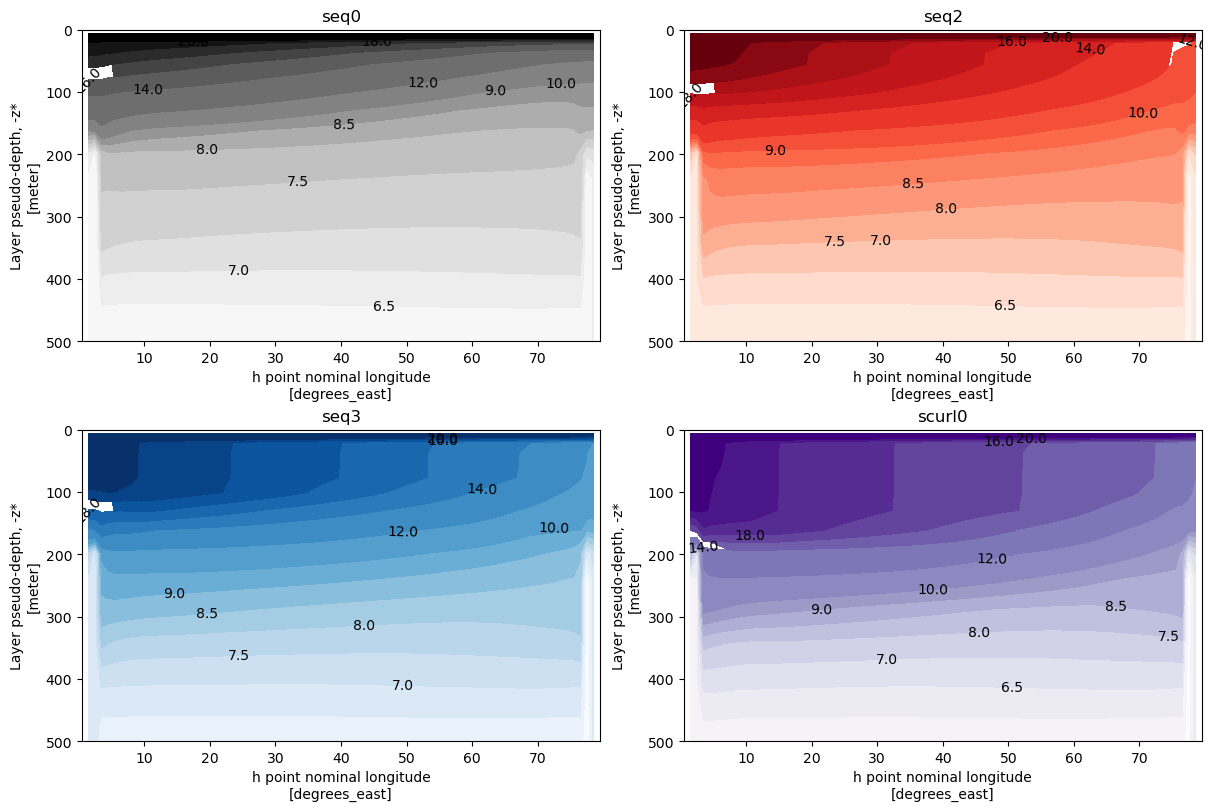

In [5]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,8))

a=[5.0,6.0,6.5,7.0,7.5,8.0,8.5,9.0,10.0,12.0,14.0,16.0,18.0,20.0]

seq0=ds_seq0.temp.isel(yh=70, Time=-1).plot.contourf(ax=ax[0,0], levels=a, cmap="Greys", add_colorbar=False)
seqw=ds_seqw.temp.isel(yh=70, Time=-1).plot.contourf(ax=ax[0,1], levels=a, cmap="Reds", add_colorbar=False)
seq3=ds_seq3.temp.isel(yh=70, Time=-1).plot.contourf(ax=ax[1,0], levels=a, cmap="Blues", add_colorbar=False)
scurl0=ds_scurl0.temp.isel(yh=70, Time=-1).plot.contourf(ax=ax[1,1], levels=a, cmap="Purples", add_colorbar=False)

ax[0,0].clabel(seq0, fontsize=10, colors='black')
ax[0,1].clabel(seqw,  fontsize=10, colors='black')
ax[1,0].clabel(seq3, fontsize=10, colors='black')
ax[1,1].clabel(scurl0,  fontsize=10, colors='black')

ax[0,0].set_title("seq0")
ax[0,1].set_title("seq2")
ax[1,1].set_title("scurl0")
ax[1,0].set_title("seq3")

ax[0, 0].set_ylim(0,500)
ax[1, 0].set_ylim(0,500)
ax[0, 1].set_ylim(0,500)
ax[1, 1].set_ylim(0,500)

ax[0,0].invert_yaxis()
ax[1,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,1].invert_yaxis()

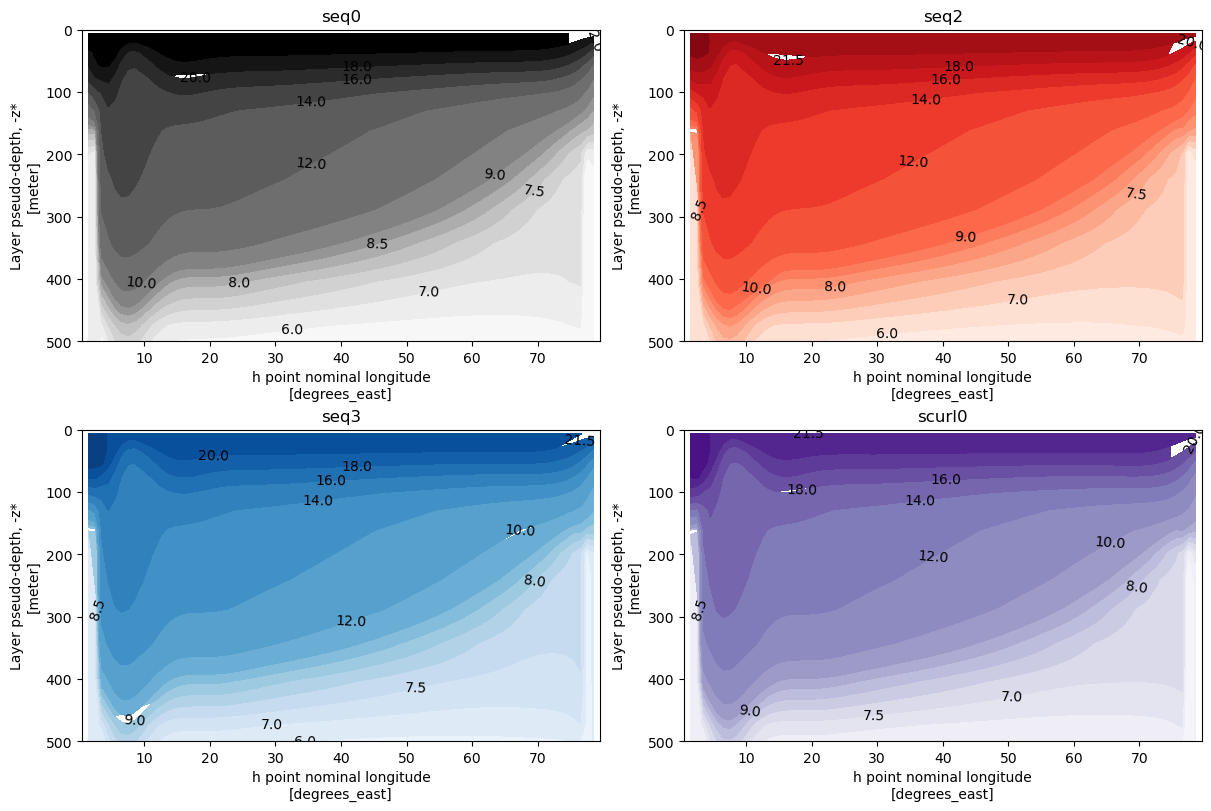

In [6]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,8))

a=[5.0,6.0,6.5,7.0,7.5,8.0,8.5,9.0,10.0,12.0,14.0,16.0,18.0,20.0, 22]
a1=[5.0,6.0,6.5,7.0,7.5,8.0,8.5,9.0,10.0,12.0,14.0,16.0,18.0,20.0, 21.5, 23, 25]

seq0=ds_seq0.temp.isel(yh=90, Time=-1).plot.contourf(ax=ax[0,0], levels=a, cmap="Greys", add_colorbar=False)
seqw=ds_seqw.temp.isel(yh=90, Time=-1).plot.contourf(ax=ax[0,1], levels=a1, cmap="Reds", add_colorbar=False)
seq3=ds_seq3.temp.isel(yh=90, Time=-1).plot.contourf(ax=ax[1,0], levels=a1, cmap="Blues", add_colorbar=False)
scurl0=ds_scurl0.temp.isel(yh=90, Time=-1).plot.contourf(ax=ax[1,1], levels=a1, cmap="Purples", add_colorbar=False)

ax[0,0].clabel(seq0, fontsize=10, colors='black')
ax[0,1].clabel(seqw,  fontsize=10, colors='black')
ax[1,0].clabel(seq3, fontsize=10, colors='black')
ax[1,1].clabel(scurl0,  fontsize=10, colors='black')

ax[0,0].set_title("seq0")
ax[0,1].set_title("seq2")
ax[1,1].set_title("scurl0")
ax[1,0].set_title("seq3")

ax[0, 0].set_ylim(0,500)
ax[1, 0].set_ylim(0,500)
ax[0, 1].set_ylim(0,500)
ax[1, 1].set_ylim(0,500)

ax[0,0].invert_yaxis()
ax[1,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,1].invert_yaxis()

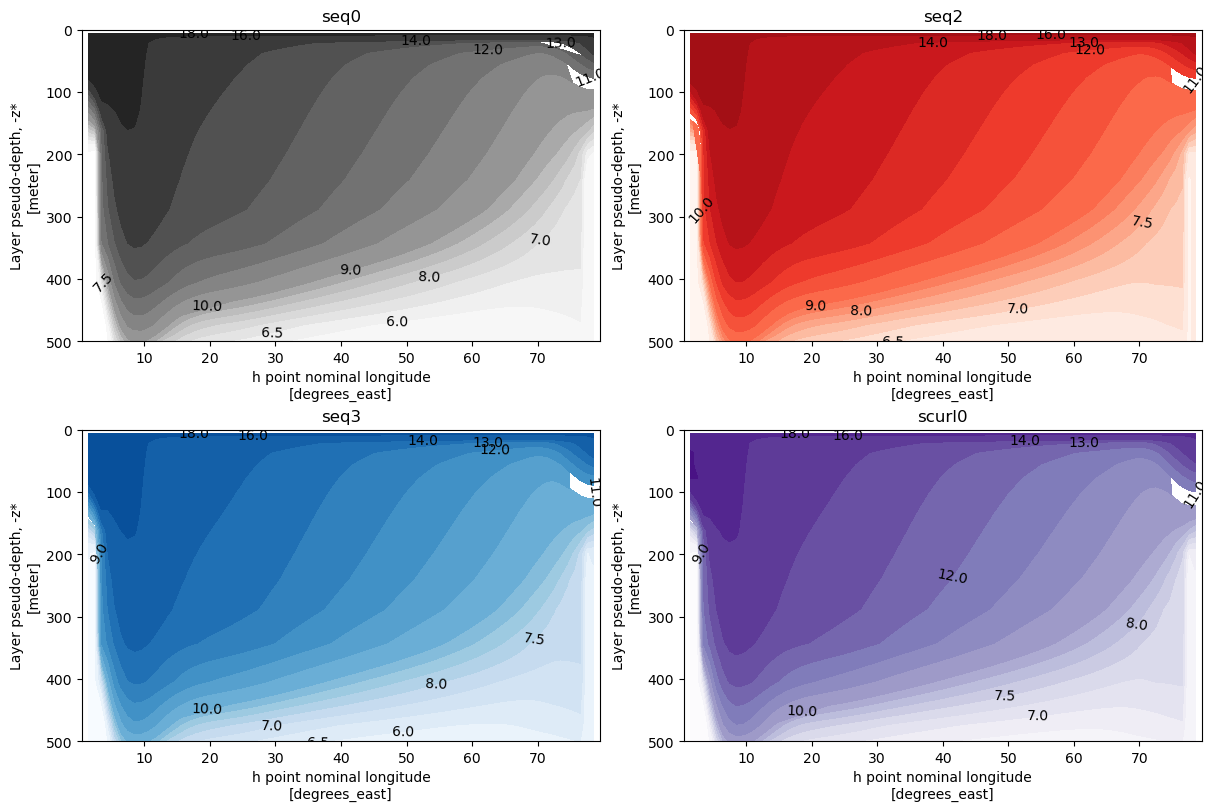

In [7]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,8))

a=[5.0,6.0,6.5,7.0,7.5,8.0,8.5,9.0,10.0,11.0, 12.0,13.0,14.0,16.0,18.0,20.0, 22]
a1=[5.0,6.0,6.5,7.0,7.5,8.0,8.5,9.0,10.0,12.0,14.0,16.0,18.0,20.0, 21.5, 23, 25]

seq0=ds_seq0.temp.isel(yh=100, Time=-1).plot.contourf(ax=ax[0,0], levels=a, cmap="Greys", add_colorbar=False)
seqw=ds_seqw.temp.isel(yh=100, Time=-1).plot.contourf(ax=ax[0,1], levels=a, cmap="Reds", add_colorbar=False)
seq3=ds_seq3.temp.isel(yh=100, Time=-1).plot.contourf(ax=ax[1,0], levels=a, cmap="Blues", add_colorbar=False)
scurl0=ds_scurl0.temp.isel(yh=100, Time=-1).plot.contourf(ax=ax[1,1], levels=a, cmap="Purples", add_colorbar=False)

ax[0,0].clabel(seq0, fontsize=10, colors='black')
ax[0,1].clabel(seqw,  fontsize=10, colors='black')
ax[1,0].clabel(seq3, fontsize=10, colors='black')
ax[1,1].clabel(scurl0,  fontsize=10, colors='black')

ax[0,0].set_title("seq0")
ax[0,1].set_title("seq2")
ax[1,1].set_title("scurl0")
ax[1,0].set_title("seq3")

ax[0, 0].set_ylim(0,500)
ax[1, 0].set_ylim(0,500)
ax[0, 1].set_ylim(0,500)
ax[1, 1].set_ylim(0,500)

ax[0,0].invert_yaxis()
ax[1,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,1].invert_yaxis()

Text(0, 0.5, '')

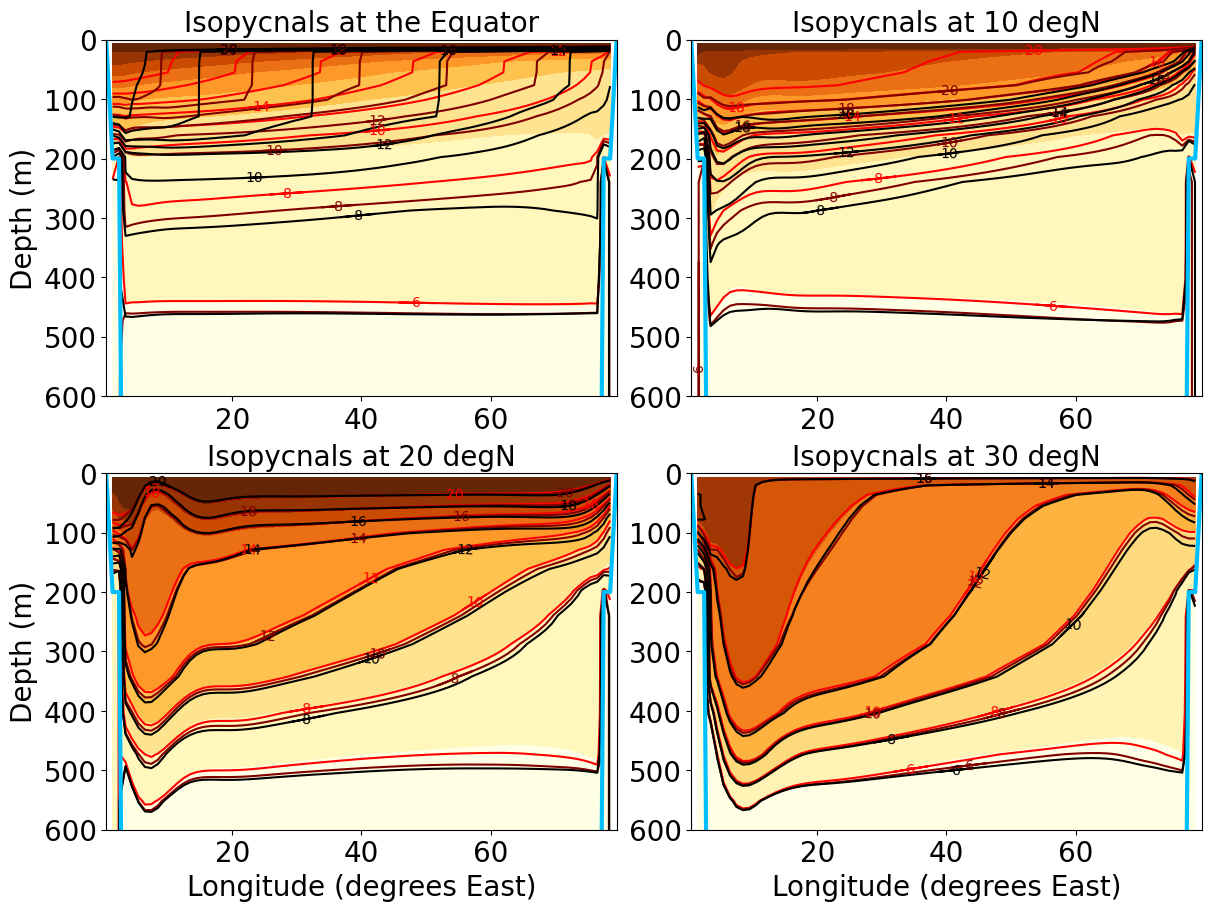

In [53]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,9))
b=[6.0,7.5,9.0,10.5,12.0,13.5,15,17,19,20]

seq0=ds_seq0.temp.isel(yh=70, Time=-1).plot.contourf(ax=ax[0,0],levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seq2.temp.isel(yh=70, Time=-1).plot.contour(ax=ax[0,0],levels=a1, linewidth = 0.1, colors='red')
seq3=ds_seq3.temp.isel(yh=70, Time=-1).plot.contour(ax=ax[0,0],levels=a1, linewidth = 0.1, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=70, Time=-1).plot.contour(ax=ax[0,0],levels=a1, linewidth = 0.1, colors='black')
geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[0,0])


ax[0,0].clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax[0,0].clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax[0,0].clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax[0,0].set_ylim(0,600)
ax[0,0].invert_yaxis()
ax[0,0].set_title('Isopycnals at the Equator', fontsize=20)
ax[0,0].tick_params(axis='both',labelsize=20)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel("Depth (m)", fontsize=20)

seq0=ds_seq0.temp.isel(yh=80, Time=-1).plot.contourf(ax=ax[0,1],levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seq2.temp.isel(yh=80, Time=-1).plot.contour(ax=ax[0,1],levels=a1, linewidth = 0.2, colors='red')
seq3=ds_seq3.temp.isel(yh=80, Time=-1).plot.contour(ax=ax[0,1],levels=a1, linewidth = 0.2, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=80, Time=-1).plot.contour(ax=ax[0,1],levels=a1, linewidth = 0.2, colors='black')
geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[0,1])


ax[0,1].clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax[0,1].clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax[0,1].clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax[0,1].set_ylim(0,600)
ax[0,1].invert_yaxis()
ax[0,1].set_title('Isopycnals at 10 degN', fontsize=20)
ax[0,1].tick_params(axis='both',labelsize=20)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')

seq0=ds_seq0.temp.isel(yh=90, Time=-1).plot.contourf(ax=ax[1,0],levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seq2.temp.isel(yh=90, Time=-1).plot.contour(ax=ax[1,0],levels=a1, linewidth = 0.2, colors='red')
seq3=ds_seq3.temp.isel(yh=90, Time=-1).plot.contour(ax=ax[1,0],levels=a1, linewidth = 0.2, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=90, Time=-1).plot.contour(ax=ax[1,0],levels=a1, linewidth = 0.2, colors='black')
geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[1,0])


ax[1,0].clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax[1,0].clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax[1,0].clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax[1,0].set_ylim(0,600)
ax[1,0].invert_yaxis()
ax[1,0].set_title('Isopycnals at 20 degN', fontsize=20)
ax[1,0].tick_params(axis='both',labelsize=20)
ax[1,0].set_xlabel("Longitude (degrees East)", fontsize=20)
ax[1,0].set_ylabel("Depth (m)", fontsize=20)

seq0=ds_seq0.temp.isel(yh=100, Time=-1).plot.contourf(ax=ax[1,1],levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seq2.temp.isel(yh=100, Time=-1).plot.contour(ax=ax[1,1],levels=a1, linewidth = 0.2, colors='red')
seq3=ds_seq3.temp.isel(yh=100, Time=-1).plot.contour(ax=ax[1,1],levels=a1, linewidth = 0.2, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=100, Time=-1).plot.contour(ax=ax[1,1],levels=a1, linewidth = 0.2, colors='black')
geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[1,1])


ax[1,1].clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax[1,1].clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax[1,1].clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax[1,1].set_ylim(0,600)
ax[1,1].invert_yaxis()
ax[1,1].set_title('Isopycnals at 30 degN', fontsize=20)
ax[1,1].tick_params(axis='both',labelsize=20)
ax[1,1].set_xlabel("Longitude (degrees East)", fontsize=20)
ax[1,1].set_ylabel('')

# plt.savefig('iso.png')


TypeError: from_bounds() missing 2 required positional arguments: 'width' and 'height'

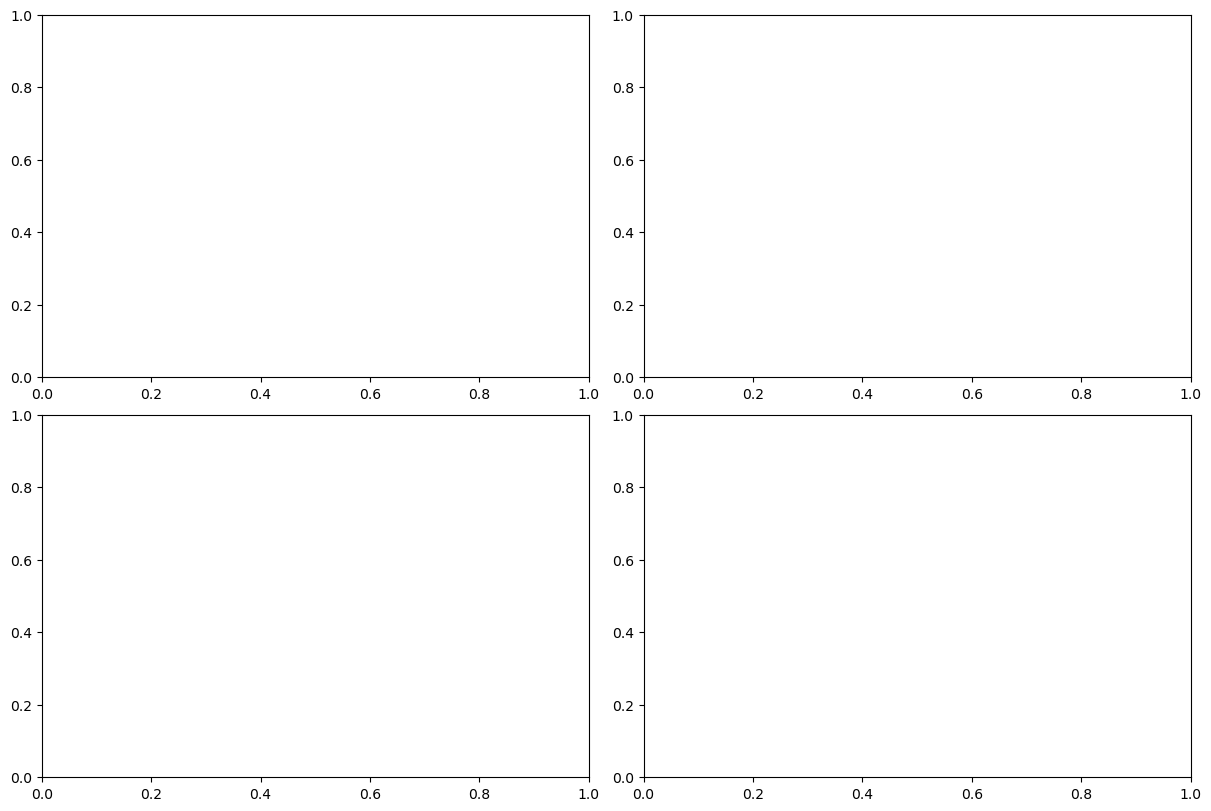

In [40]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,8))
b=[6.0,7.5,9.0,10.5,12.0,13.5,15,17,19,20]

ax1 = fig.add_subplot(ax[0, :])
seq0=ds_seq0.temp.isel(yh=70, Time=-1).plot.contourf(ax=ax1,levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seq2.temp.isel(yh=70, Time=-1).plot.contour(ax=ax1,levels=a1, linewidth = 0.2, colors='red')
seq3=ds_seq3.temp.isel(yh=70, Time=-1).plot.contour(ax=ax1,levels=a1, linewidth = 0.2, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=70, Time=-1).plot.contour(ax=ax1,levels=a1, linewidth = 0.2, colors='black')
geo.D.isel(yh=70).plot(linewidth=2,ax=ax1)


ax1.clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax1.clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax1.clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax1.set_ylim(0,600)
ax1.invert_yaxis()
ax1.set_title('Isopycnals at the Equator', fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax1.set_xlabel('')
ax1.set_ylabel("Depth (m)", fontsize=20)

# seq0=ds_seq0.temp.isel(yh=80, Time=-1).plot.contourf(ax=ax[0,1],levels=a1, cmap="YlOrBr",add_colorbar=False)
# seqw=ds_seq2.temp.isel(yh=80, Time=-1).plot.contour(ax=ax[0,1],levels=a1, linewidth = 0.2, colors='red')
# seq3=ds_seq3.temp.isel(yh=80, Time=-1).plot.contour(ax=ax[0,1],levels=a1, linewidth = 0.2, colors='maroon')
# scurl0=ds_scurl0.temp.isel(yh=80, Time=-1).plot.contour(ax=ax[0,1],levels=a1, linewidth = 0.2, colors='black')

# ax[0,1].clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
# ax[0,1].clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
# ax[0,1].clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
# ax[0,1].set_ylim(0,600)
# ax[0,1].invert_yaxis()
# ax[0,1].set_title('Isopycnals at 10 degN', fontsize=20)
# ax[0,1].tick_params(axis='both',labelsize=20)
# ax[0,1].set_xlabel('')
# ax[0,1].set_ylabel('')

seq0=ds_seq0.temp.isel(yh=90, Time=-1).plot.contourf(ax=ax[1,0],levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seq2.temp.isel(yh=90, Time=-1).plot.contour(ax=ax[1,0],levels=a1, linewidth = 0.2, colors='red')
seq3=ds_seq3.temp.isel(yh=90, Time=-1).plot.contour(ax=ax[1,0],levels=a1, linewidth = 0.2, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=90, Time=-1).plot.contour(ax=ax[1,0],levels=a1, linewidth = 0.2, colors='black')

ax[1,0].clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax[1,0].clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax[1,0].clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax[1,0].set_ylim(0,600)
ax[1,0].invert_yaxis()
ax[1,0].set_title('Isopycnals at 20 degN', fontsize=20)
ax[1,0].tick_params(axis='both',labelsize=20)
ax[1,0].set_xlabel("Longitude (degrees East)", fontsize=20)
ax[1,0].set_ylabel("Depth (m)", fontsize=20)

seq0=ds_seq0.temp.isel(yh=100, Time=-1).plot.contourf(ax=ax[1,1],levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seq2.temp.isel(yh=100, Time=-1).plot.contour(ax=ax[1,1],levels=a1, linewidth = 0.2, colors='red')
seq3=ds_seq3.temp.isel(yh=100, Time=-1).plot.contour(ax=ax[1,1],levels=a1, linewidth = 0.2, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=100, Time=-1).plot.contour(ax=ax[1,1],levels=a1, linewidth = 0.2, colors='black')

ax[1,1].clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax[1,1].clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax[1,1].clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax[1,1].set_ylim(0,600)
ax[1,1].invert_yaxis()
ax[1,1].set_title('Isopycnals at 30 degN', fontsize=20)
ax[1,1].tick_params(axis='both',labelsize=20)
ax[1,1].set_xlabel("Longitude (degrees East)", fontsize=20)
ax[1,1].set_ylabel('')

# plt.savefig('iso.png')


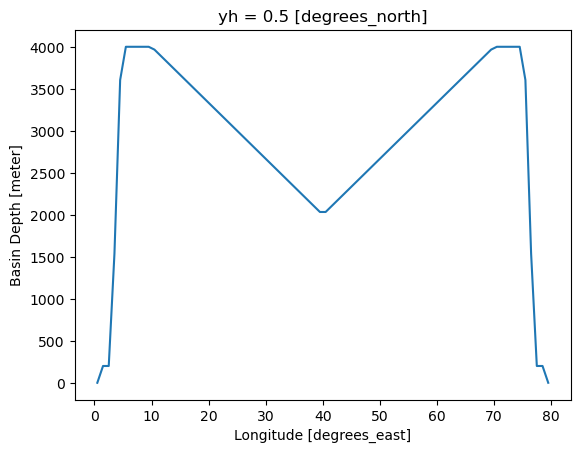

In [30]:
geo.D.isel(yh=70).plot()

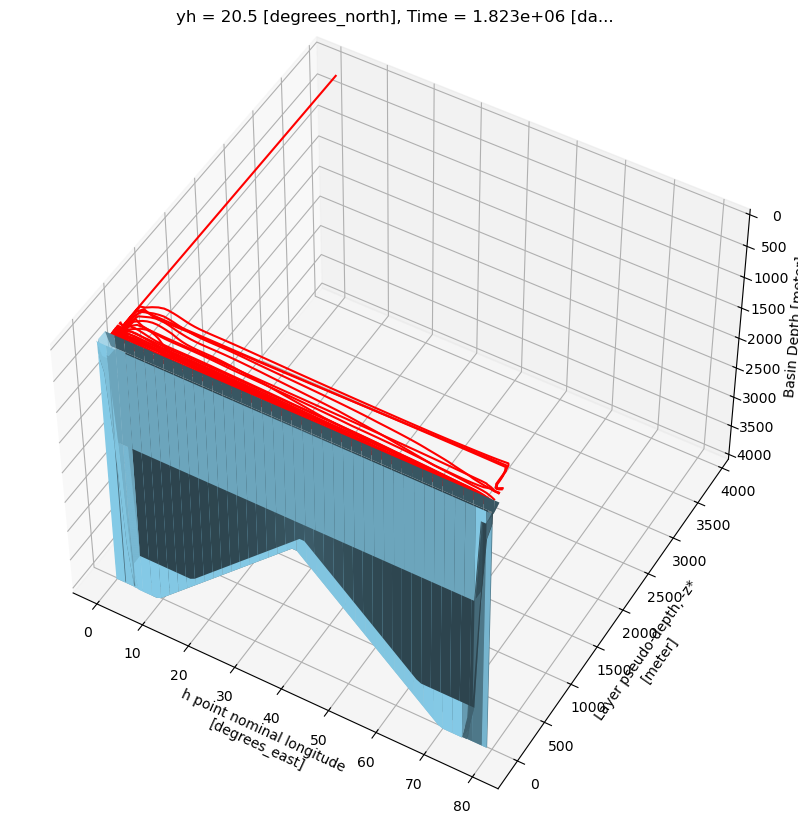

In [20]:
geo.D.plot.surface(size=10, aspect=2, color='skyblue')
plt.gca().invert_zaxis()
plt.gca().view_init(48)

seqw=ds_seq2.temp.isel(yh=70, Time=-1).plot.contour(levels=a1, linewidth = 0.2, colors='red')
seqw=ds_seq2.temp.isel(yh=80, Time=-1).plot.contour(levels=a1, linewidth = 0.2, colors='red')
seqw=ds_seq2.temp.isel(yh=90, Time=-1).plot.contour(levels=a1, linewidth = 0.2, colors='red')


Text(0, 0.5, '')

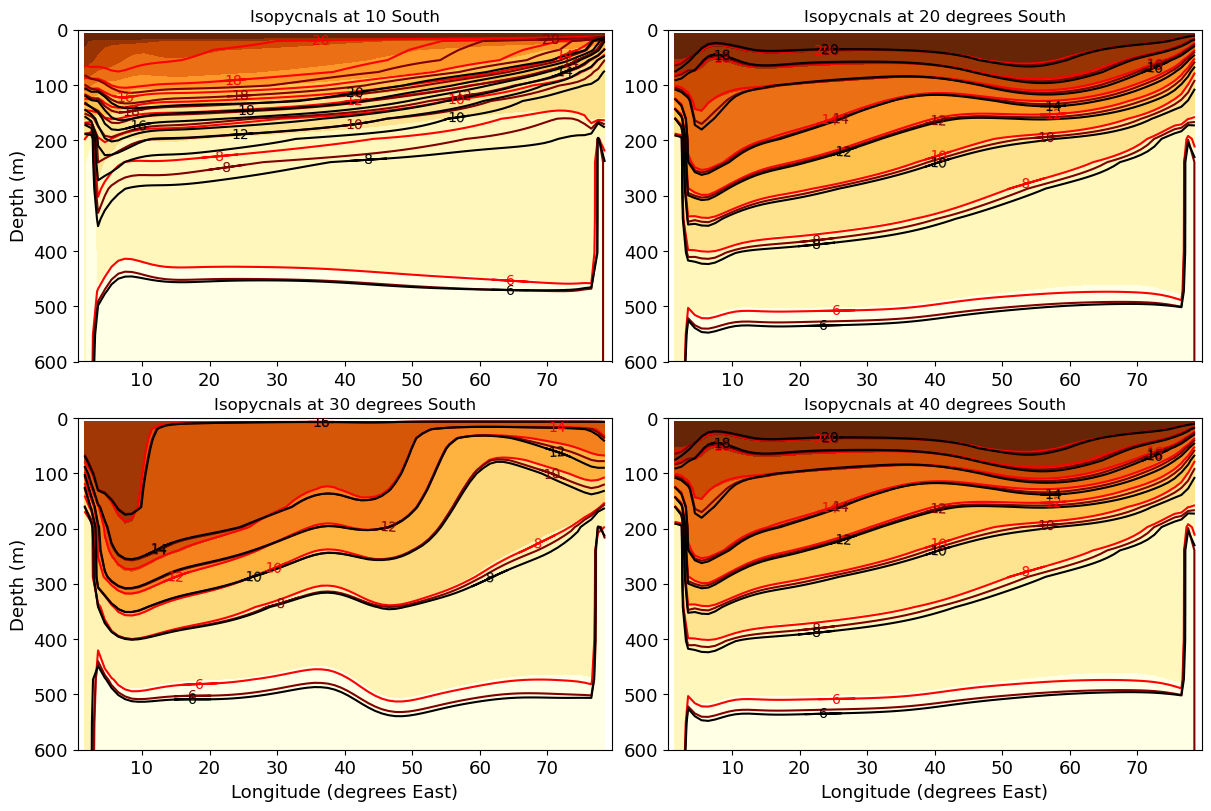

In [27]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,8))
b=[6.0,7.5,9.0,10.5,12.0,13.5,15,17,19,20]

seq0=ds_seq0.temp.isel(yh=60, Time=-1).plot.contourf(ax=ax[0,0],levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seqw.temp.isel(yh=60, Time=-1).plot.contour(ax=ax[0,0],levels=a1, linewidth = 0.2, colors='red')
seq3=ds_seq3.temp.isel(yh=60, Time=-1).plot.contour(ax=ax[0,0],levels=a1, linewidth = 0.2, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=60, Time=-1).plot.contour(ax=ax[0,0],levels=a1, linewidth = 0.2, colors='black')

ax[0,0].clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax[0,0].clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax[0,0].clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax[0,0].set_ylim(0,600)
ax[0,0].invert_yaxis()
ax[0,0].set_title('Isopycnals at 10 South')
ax[0,0].tick_params(axis='both',labelsize=13)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel("Depth (m)", fontsize=13)

seq0=ds_seq0.temp.isel(yh=50, Time=-1).plot.contourf(ax=ax[0,1],levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seqw.temp.isel(yh=50, Time=-1).plot.contour(ax=ax[0,1],levels=a1, linewidth = 0.2, colors='red')
seq3=ds_seq3.temp.isel(yh=50, Time=-1).plot.contour(ax=ax[0,1],levels=a1, linewidth = 0.2, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=50, Time=-1).plot.contour(ax=ax[0,1],levels=a1, linewidth = 0.2, colors='black')

ax[0,1].clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax[0,1].clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax[0,1].clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax[0,1].set_ylim(0,600)
ax[0,1].invert_yaxis()
ax[0,1].set_title('Isopycnals at 20 degrees South')
ax[0,1].tick_params(axis='both',labelsize=13)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')

seq0=ds_seq0.temp.isel(yh=40, Time=-1).plot.contourf(ax=ax[1,0],levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seqw.temp.isel(yh=40, Time=-1).plot.contour(ax=ax[1,0],levels=a1, linewidth = 0.2, colors='red')
seq3=ds_seq3.temp.isel(yh=40, Time=-1).plot.contour(ax=ax[1,0],levels=a1, linewidth = 0.2, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=40, Time=-1).plot.contour(ax=ax[1,0],levels=a1, linewidth = 0.2, colors='black')

ax[1,0].clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax[1,0].clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax[1,0].clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax[1,0].set_ylim(0,600)
ax[1,0].invert_yaxis()
ax[1,0].set_title('Isopycnals at 30 degrees South')
ax[1,0].tick_params(axis='both',labelsize=13)
ax[1,0].set_xlabel("Longitude (degrees East)", fontsize=13)
ax[1,0].set_ylabel("Depth (m)", fontsize=13)

seq0=ds_seq0.temp.isel(yh=50, Time=-1).plot.contourf(ax=ax[1,1],levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seqw.temp.isel(yh=50, Time=-1).plot.contour(ax=ax[1,1],levels=a1, linewidth = 0.2, colors='red')
seq3=ds_seq3.temp.isel(yh=50, Time=-1).plot.contour(ax=ax[1,1],levels=a1, linewidth = 0.2, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=50, Time=-1).plot.contour(ax=ax[1,1],levels=a1, linewidth = 0.2, colors='black')

ax[1,1].clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax[1,1].clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax[1,1].clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax[1,1].set_ylim(0,600)
ax[1,1].invert_yaxis()
ax[1,1].set_title('Isopycnals at 40 degrees South')
ax[1,1].tick_params(axis='both',labelsize=13)
ax[1,1].set_xlabel("Longitude (degrees East)", fontsize=13)
ax[1,1].set_ylabel('')


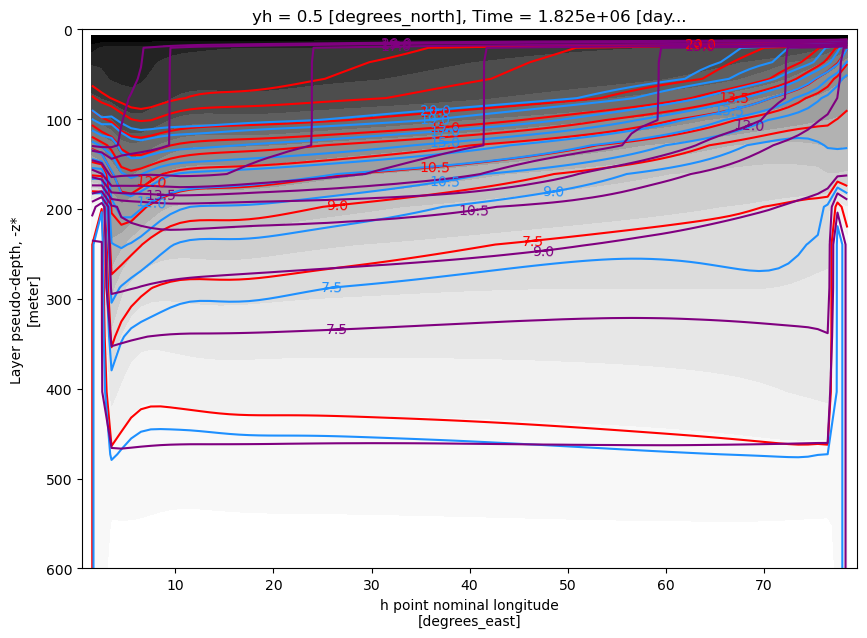

In [32]:
plt.figure(figsize=(10,7))
seq0=ds_seq0.temp.isel(yh=80, Time=-1).plot.contourf(levels=a, cmap="Greys", add_colorbar=False)
seqw=ds_seqw.temp.isel(yh=80, Time=-1).plot.contour(levels=b, linewidth = 0.2, colors='r')
seq3=ds_seq3.temp.isel(yh=80, Time=-1).plot.contour(levels=b, linewidth = 0.2, colors='dodgerblue')
scurl0=ds_scurl0.temp.isel(yh=70, Time=-1).plot.contour(levels=b, linewidth = 0.2, colors='purple')

plt.clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
plt.clabel(seq3, inline_spacing=-19, fontsize=10, colors='dodgerblue')
plt.clabel(scurl0, inline_spacing=-19, fontsize=10, colors='purple')

plt.gca().set_ylim(0,600)
plt.gca().invert_yaxis()

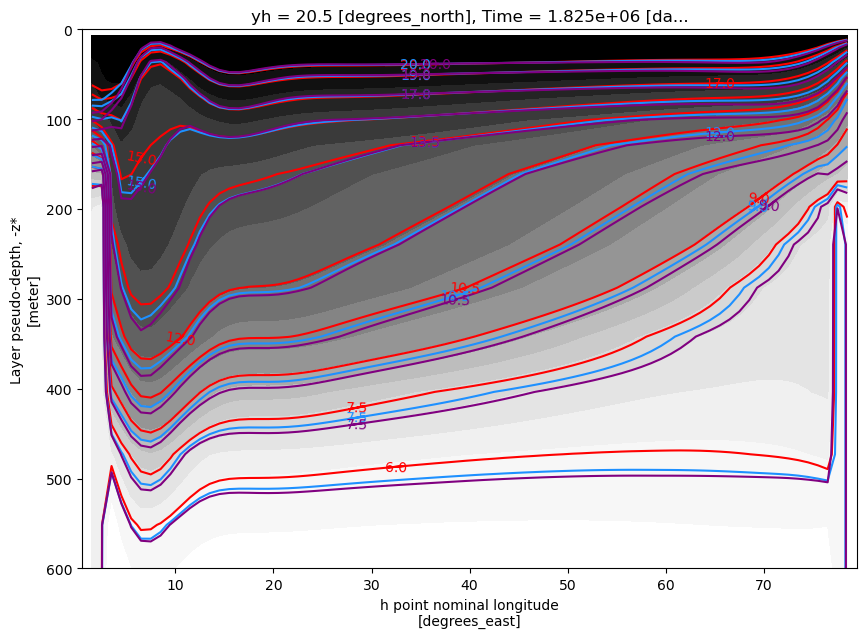

In [33]:
plt.figure(figsize=(10,7))
seq0=ds_seq0.temp.isel(yh=90, Time=-1).plot.contourf(levels=a, cmap="Greys", add_colorbar=False)
seqw=ds_seqw.temp.isel(yh=90, Time=-1).plot.contour(levels=b, linewidth = 0.2, colors='r')
seq3=ds_seq3.temp.isel(yh=90, Time=-1).plot.contour(levels=b, linewidth = 0.2, colors='dodgerblue')
scurl0=ds_scurl0.temp.isel(yh=90, Time=-1).plot.contour(levels=b, linewidth = 0.2, colors='purple')

plt.clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
plt.clabel(seq3, inline_spacing=-19, fontsize=10, colors='dodgerblue')
plt.clabel(scurl0, inline_spacing=-19, fontsize=10, colors='purple')

plt.gca().set_ylim(0,600)
plt.gca().invert_yaxis()

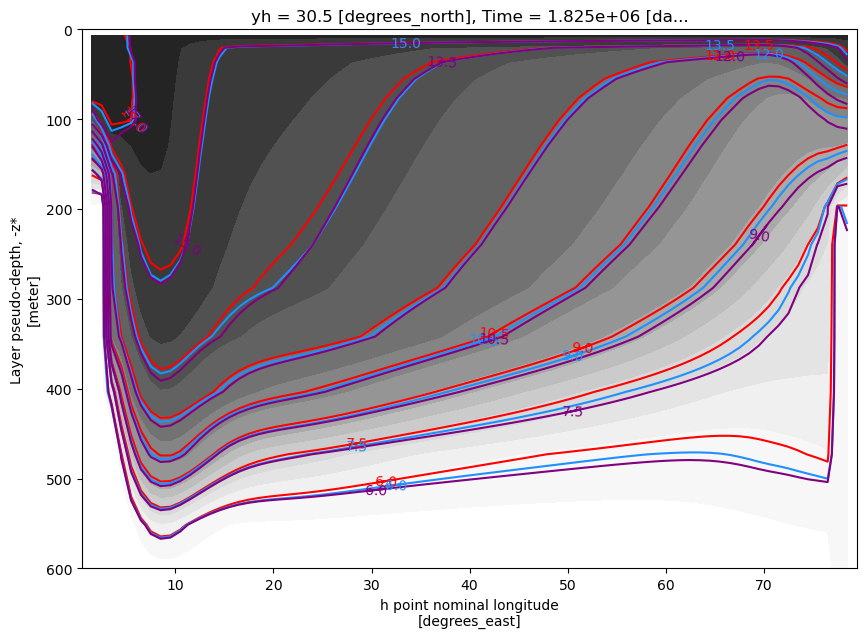

In [34]:
plt.figure(figsize=(10,7))
seq0=ds_seq0.temp.isel(yh=100, Time=-1).plot.contourf(levels=a, cmap="Greys", add_colorbar=False)
seqw=ds_seqw.temp.isel(yh=100, Time=-1).plot.contour(levels=b, linewidth = 0.2, colors='r')
seq3=ds_seq3.temp.isel(yh=100, Time=-1).plot.contour(levels=b, linewidth = 0.2, colors='dodgerblue')
scurl0=ds_scurl0.temp.isel(yh=100, Time=-1).plot.contour(levels=b, linewidth = 0.2, colors='purple')

plt.clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
plt.clabel(seq3, inline_spacing=-19, fontsize=10, colors='dodgerblue')
plt.clabel(scurl0, inline_spacing=-19, fontsize=10, colors='purple')

plt.gca().set_ylim(0,600)
plt.gca().invert_yaxis()

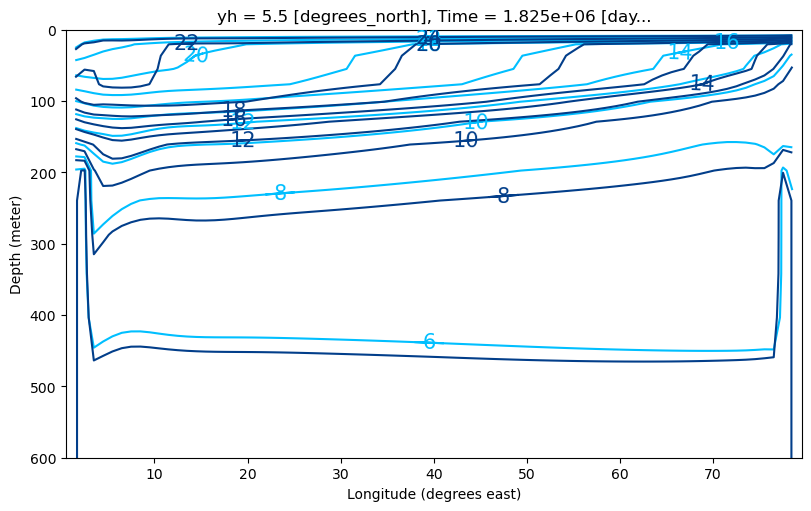

In [5]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8, 5))

# Plot contours
seqw=ds_seqw.temp.isel(yh=75, Time=-1).plot.contour(levels=15, colors='deepskyblue', add_colorbar=False)
seq3=ds_seq3.temp.isel(yh=75, Time=-1).plot.contour(levels=15, colors='#023E8A', add_colorbar=False)

# Add contour labels
ax.clabel(seqw, inline_spacing=-19, fontsize=15, colors='deepskyblue')
ax.clabel(seq3, inline_spacing=-19, fontsize=15, colors='#023E8A')

# Set axis limits and labels
ax.set_ylim(0, 600)
ax.invert_yaxis()
plt.xlabel('Longitude (degrees east)')
plt.ylabel('Depth (meter)')
plt.tick_params(axis='both', which='major')
# Show the plot
plt.show()

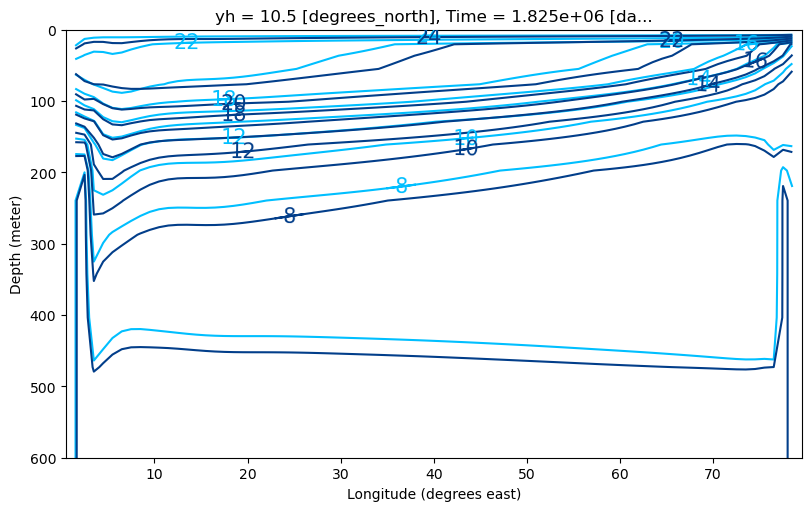

In [6]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8, 5))

# Plot contours
seqw=ds_seqw.temp.isel(yh=80, Time=-1).plot.contour(levels=15, colors='deepskyblue', add_colorbar=False)
seq3=ds_seq3.temp.isel(yh=80, Time=-1).plot.contour(levels=15, colors='#023E8A', add_colorbar=False)

# Add contour labels
ax.clabel(seqw, inline_spacing=-19, fontsize=15, colors='deepskyblue')
ax.clabel(seq3, inline_spacing=-19, fontsize=15, colors='#023E8A')

# Set axis limits and labels
ax.set_ylim(0, 600)
ax.invert_yaxis()
plt.xlabel('Longitude (degrees east)')
plt.ylabel('Depth (meter)')
plt.tick_params(axis='both', which='major')
# Show the plot
plt.show()

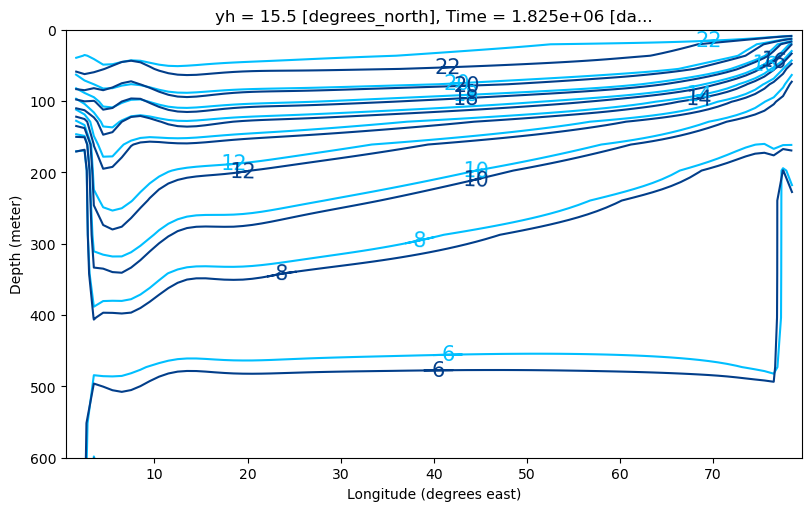

In [7]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8, 5))

# Plot contours
seqw=ds_seqw.temp.isel(yh=85, Time=-1).plot.contour(levels=15, colors='deepskyblue', add_colorbar=False)
seq3=ds_seq3.temp.isel(yh=85, Time=-1).plot.contour(levels=15, colors='#023E8A', add_colorbar=False)

# Add contour labels
ax.clabel(seqw, inline_spacing=-19, fontsize=15, colors='deepskyblue')
ax.clabel(seq3, inline_spacing=-19, fontsize=15, colors='#023E8A')

# Set axis limits and labels
ax.set_ylim(0, 600)
ax.invert_yaxis()
plt.xlabel('Longitude (degrees east)')
plt.ylabel('Depth (meter)')
plt.tick_params(axis='both', which='major')
# Show the plot
plt.show()

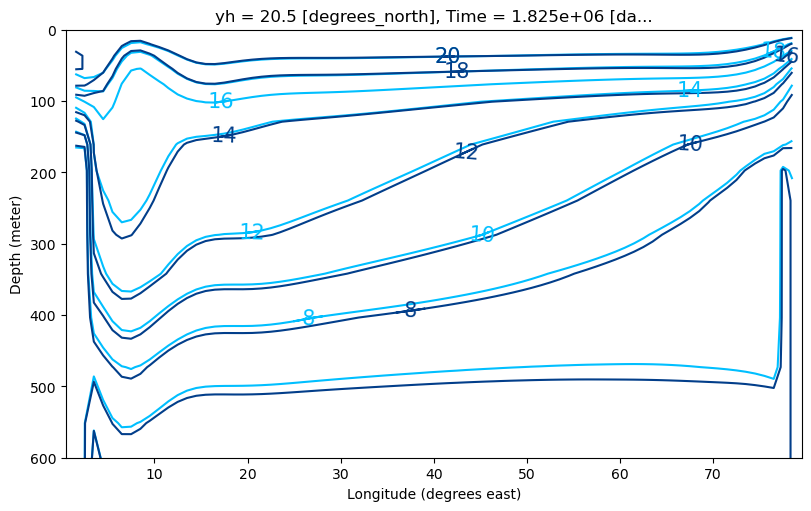

In [8]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8, 5))

# Plot contours
seqw=ds_seqw.temp.isel(yh=90, Time=-1).plot.contour(levels=15, colors='deepskyblue', add_colorbar=False)
seq3=ds_seq3.temp.isel(yh=90, Time=-1).plot.contour(levels=15, colors='#023E8A', add_colorbar=False)

# Add contour labels
ax.clabel(seqw, inline_spacing=-19, fontsize=15, colors='deepskyblue')
ax.clabel(seq3, inline_spacing=-19, fontsize=15, colors='#023E8A')

# Set axis limits and labels
ax.set_ylim(0, 600)
ax.invert_yaxis()
plt.xlabel('Longitude (degrees east)')
plt.ylabel('Depth (meter)')
plt.tick_params(axis='both', which='major')
# Show the plot
plt.show()

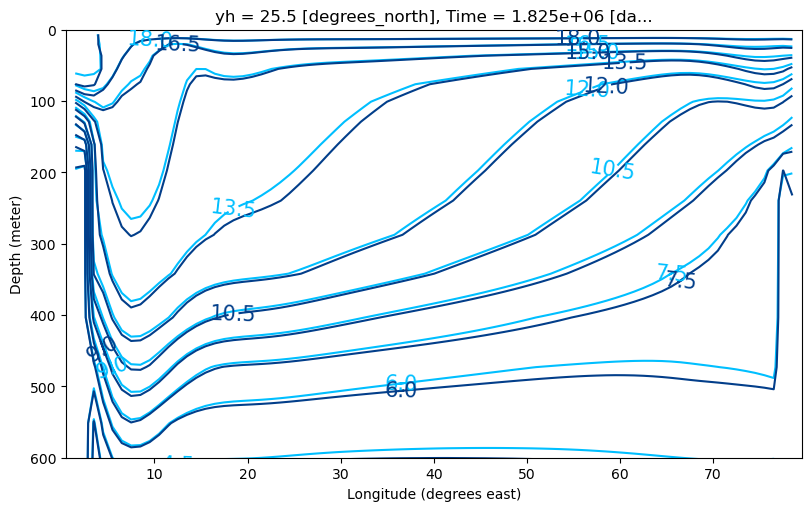

In [9]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8, 5))

# Plot contours
seqw=ds_seqw.temp.isel(yh=95, Time=-1).plot.contour(levels=15, colors='deepskyblue', add_colorbar=False)
seq3=ds_seq3.temp.isel(yh=95, Time=-1).plot.contour(levels=15, colors='#023E8A', add_colorbar=False)

# Add contour labels
ax.clabel(seqw, inline_spacing=-19, fontsize=15, colors='deepskyblue')
ax.clabel(seq3, inline_spacing=-19, fontsize=15, colors='#023E8A')

# Set axis limits and labels
ax.set_ylim(0, 600)
ax.invert_yaxis()
plt.xlabel('Longitude (degrees east)')
plt.ylabel('Depth (meter)')
plt.tick_params(axis='both', which='major')
# Show the plot
plt.show()

# Initial Comparisons

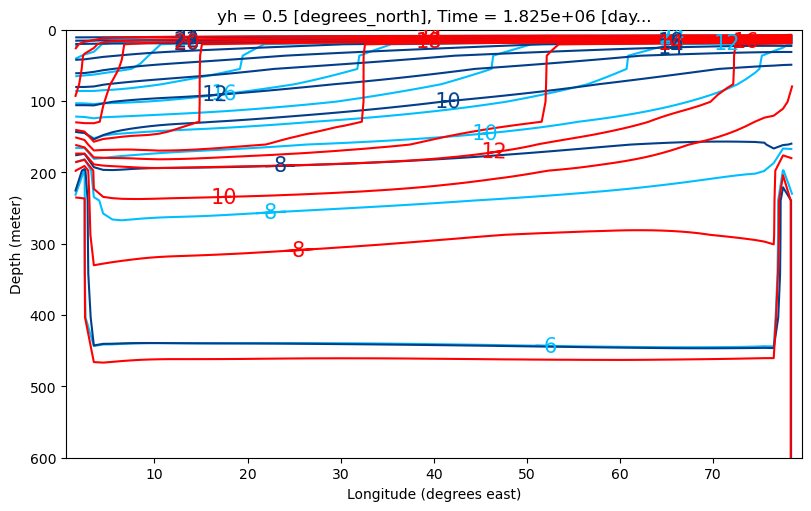

In [5]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8, 5))

# Plot contours
seqw=ds_seqw.temp.isel(yh=70, Time=-1).plot.contour(levels=15, colors='deepskyblue', add_colorbar=False)
seq0=ds_seq0.temp.isel(yh=70, Time=-1).plot.contour(levels=15, colors='#023E8A', add_colorbar=False)
snocurl=ds_scurl0.temp.isel(yh=70, Time=-1).plot.contour(levels=15, colors='red', add_colorbar=False)

# Add contour labels
ax.clabel(seqw, inline_spacing=-19, fontsize=15, colors='deepskyblue')
ax.clabel(seq0, inline_spacing=-19, fontsize=15, colors='#023E8A')
ax.clabel(snocurl, inline_spacing=-19, fontsize=15, colors='red')

# Set axis limits and labels
ax.set_ylim(0, 600)
ax.invert_yaxis()
plt.xlabel('Longitude (degrees east)')
plt.ylabel('Depth (meter)')
plt.tick_params(axis='both', which='major')
# Show the plot
plt.show()

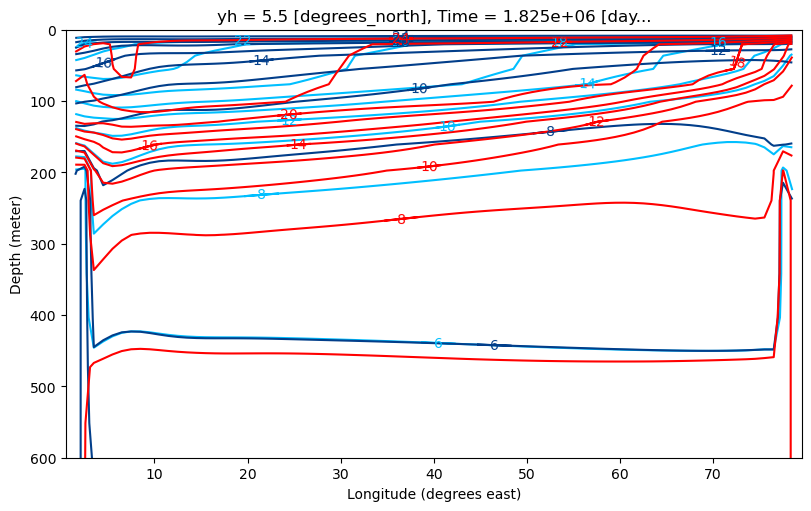

In [7]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8, 5))

# Plot contours
seqw=ds_seqw.temp.isel(yh=75, Time=-1).plot.contour(levels=15, colors='deepskyblue', add_colorbar=False)
seq0=ds_seq0.temp.isel(yh=75, Time=-1).plot.contour(levels=15, colors='#023E8A', add_colorbar=False)
snocurl=ds_scurl0.temp.isel(yh=75, Time=-1).plot.contour(levels=15, colors='red', add_colorbar=False)

# Add contour labels
ax.clabel(seqw, inline_spacing=-19, fontsize=10, colors='deepskyblue')
ax.clabel(seq0, inline_spacing=-19, fontsize=10, colors='#023E8A')
ax.clabel(snocurl, inline_spacing=-19, fontsize=10, colors='red')

# Set axis limits and labels
ax.set_ylim(0, 600)
ax.invert_yaxis()
plt.xlabel('Longitude (degrees east)')
plt.ylabel('Depth (meter)')
plt.tick_params(axis='both', which='major')
# Show the plot
plt.show()

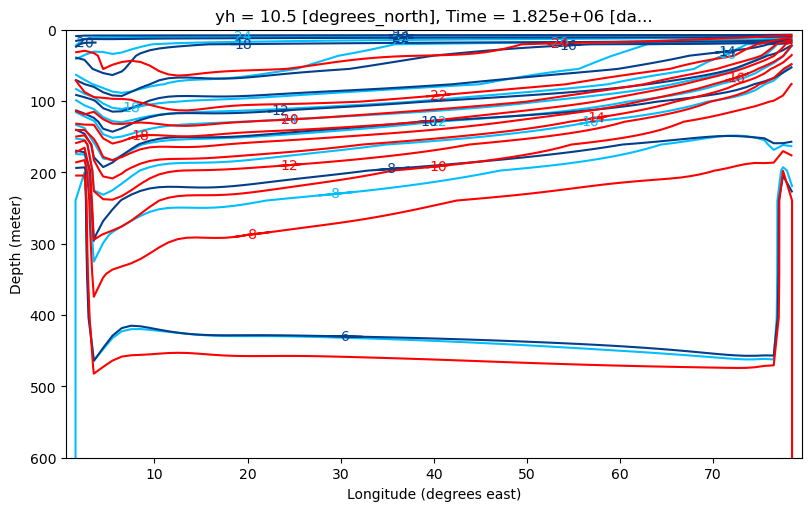

In [8]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8, 5))

# Plot contours
seqw=ds_seqw.temp.isel(yh=80, Time=-1).plot.contour(levels=15, colors='deepskyblue', add_colorbar=False)
seq0=ds_seq0.temp.isel(yh=80, Time=-1).plot.contour(levels=15, colors='#023E8A', add_colorbar=False)
snocurl=ds_scurl0.temp.isel(yh=80, Time=-1).plot.contour(levels=15, colors='red', add_colorbar=False)

# Add contour labels
ax.clabel(seqw, inline_spacing=-19, fontsize=10, colors='deepskyblue')
ax.clabel(seq0, inline_spacing=-19, fontsize=10, colors='#023E8A')
ax.clabel(snocurl, inline_spacing=-19, fontsize=10, colors='red')

# Set axis limits and labels
ax.set_ylim(0, 600)
ax.invert_yaxis()
plt.xlabel('Longitude (degrees east)')
plt.ylabel('Depth (meter)')
plt.tick_params(axis='both', which='major')
# Show the plot
plt.show()

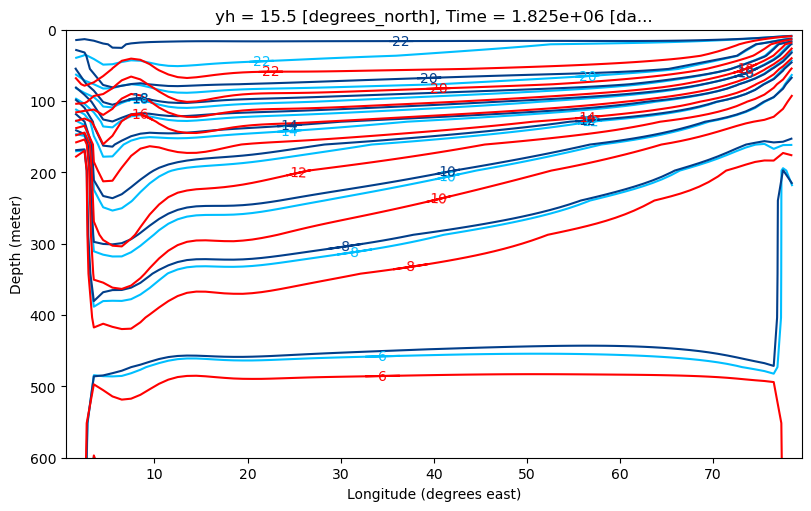

In [9]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8, 5))

# Plot contours
seqw=ds_seqw.temp.isel(yh=85, Time=-1).plot.contour(levels=15, colors='deepskyblue', add_colorbar=False)
seq0=ds_seq0.temp.isel(yh=85, Time=-1).plot.contour(levels=15, colors='#023E8A', add_colorbar=False)
snocurl=ds_scurl0.temp.isel(yh=85, Time=-1).plot.contour(levels=15, colors='red', add_colorbar=False)

# Add contour labels
ax.clabel(seqw, inline_spacing=-19, fontsize=10, colors='deepskyblue')
ax.clabel(seq0, inline_spacing=-19, fontsize=10, colors='#023E8A')
ax.clabel(snocurl, inline_spacing=-19, fontsize=10, colors='red')

# Set axis limits and labels
ax.set_ylim(0, 600)
ax.invert_yaxis()
plt.xlabel('Longitude (degrees east)')
plt.ylabel('Depth (meter)')
plt.tick_params(axis='both', which='major')
# Show the plot
plt.show()

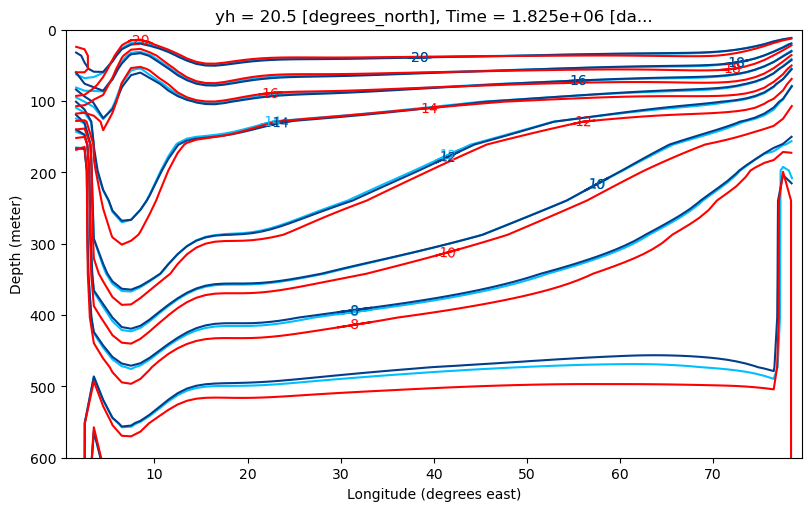

In [10]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8, 5))

# Plot contours
seqw=ds_seqw.temp.isel(yh=90, Time=-1).plot.contour(levels=15, colors='deepskyblue', add_colorbar=False)
seq0=ds_seq0.temp.isel(yh=90, Time=-1).plot.contour(levels=15, colors='#023E8A', add_colorbar=False)
snocurl=ds_scurl0.temp.isel(yh=90, Time=-1).plot.contour(levels=15, colors='red', add_colorbar=False)

# Add contour labels
ax.clabel(seqw, inline_spacing=-19, fontsize=10, colors='deepskyblue')
ax.clabel(seq0, inline_spacing=-19, fontsize=10, colors='#023E8A')
ax.clabel(snocurl, inline_spacing=-19, fontsize=10, colors='red')

# Set axis limits and labels
ax.set_ylim(0, 600)
ax.invert_yaxis()
plt.xlabel('Longitude (degrees east)')
plt.ylabel('Depth (meter)')
plt.tick_params(axis='both', which='major')
# Show the plot
plt.show()

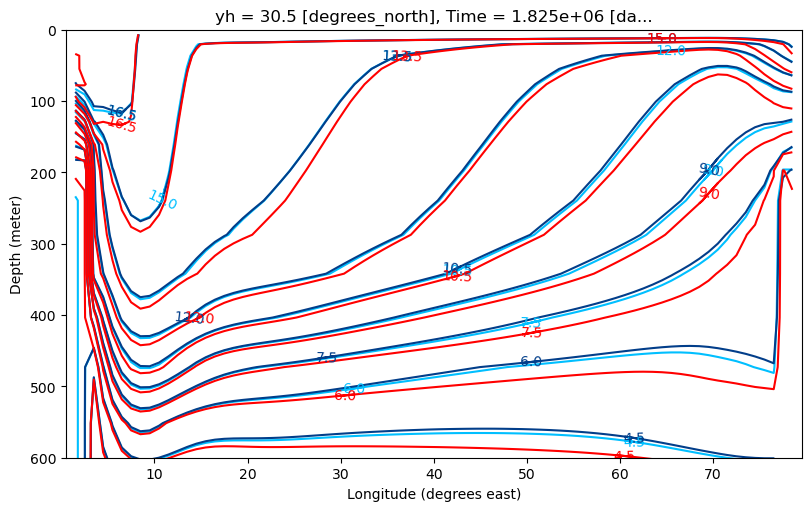

In [11]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8, 5))

# Plot contours
seqw=ds_seqw.temp.isel(yh=100, Time=-1).plot.contour(levels=15, colors='deepskyblue', add_colorbar=False)
seq0=ds_seq0.temp.isel(yh=100, Time=-1).plot.contour(levels=15, colors='#023E8A', add_colorbar=False)
snocurl=ds_scurl0.temp.isel(yh=100, Time=-1).plot.contour(levels=15, colors='red', add_colorbar=False)

# Add contour labels
ax.clabel(seqw, inline_spacing=-19, fontsize=10, colors='deepskyblue')
ax.clabel(seq0, inline_spacing=-19, fontsize=10, colors='#023E8A')
ax.clabel(snocurl, inline_spacing=-19, fontsize=10, colors='red')

# Set axis limits and labels
ax.set_ylim(0, 600)
ax.invert_yaxis()
plt.xlabel('Longitude (degrees east)')
plt.ylabel('Depth (meter)')
plt.tick_params(axis='both', which='major')
# Show the plot
plt.show()

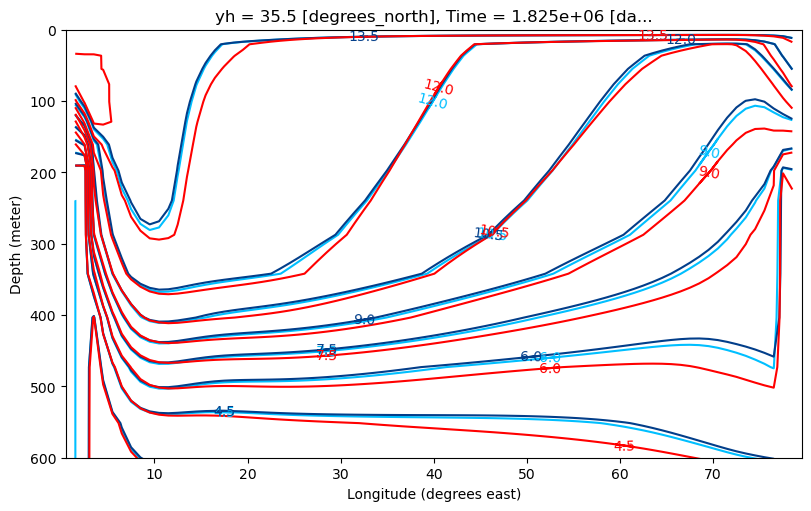

In [12]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8, 5))

# Plot contours
seqw=ds_seqw.temp.isel(yh=105, Time=-1).plot.contour(levels=15, colors='deepskyblue', add_colorbar=False)
seq0=ds_seq0.temp.isel(yh=105, Time=-1).plot.contour(levels=15, colors='#023E8A', add_colorbar=False)
snocurl=ds_scurl0.temp.isel(yh=105, Time=-1).plot.contour(levels=15, colors='red', add_colorbar=False)

# Add contour labels
ax.clabel(seqw, inline_spacing=-19, fontsize=10, colors='deepskyblue')
ax.clabel(seq0, inline_spacing=-19, fontsize=10, colors='#023E8A')
ax.clabel(snocurl, inline_spacing=-19, fontsize=10, colors='red')

# Set axis limits and labels
ax.set_ylim(0, 600)
ax.invert_yaxis()
plt.xlabel('Longitude (degrees east)')
plt.ylabel('Depth (meter)')
plt.tick_params(axis='both', which='major')
# Show the plot
plt.show()